<a href="https://colab.research.google.com/github/Anjalijagta/e-commerce-forecasting-project/blob/main/e_commerce_forecasting_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E-commerce-forecasting-project**

Shape of dataset: (120, 5)

Column names: ['Date', 'Page_Views', 'Marketing_Spend', 'Discount_Rate', 'Units_Sold']

Data types:
 Date               datetime64[ns]
Page_Views                  int64
Marketing_Spend             int64
Discount_Rate               int64
Units_Sold                  int64
dtype: object

First 5 rows:
         Date  Page_Views  Marketing_Spend  Discount_Rate  Units_Sold
0 2025-01-01       10830              836             22        1088
1 2025-01-02       11473              735             20        1127
2 2025-01-03       13304              665             11        1053
3 2025-01-04       13841             1175             27        1361
4 2025-01-05       13620              405             16         935

Missing values per column:
 Date               0
Page_Views         0
Marketing_Spend    0
Discount_Rate      0
Units_Sold         0
dtype: int64

Summary statistics:
                       Date    Page_Views  Marketing_Spend  Discount_Rate  \
count       

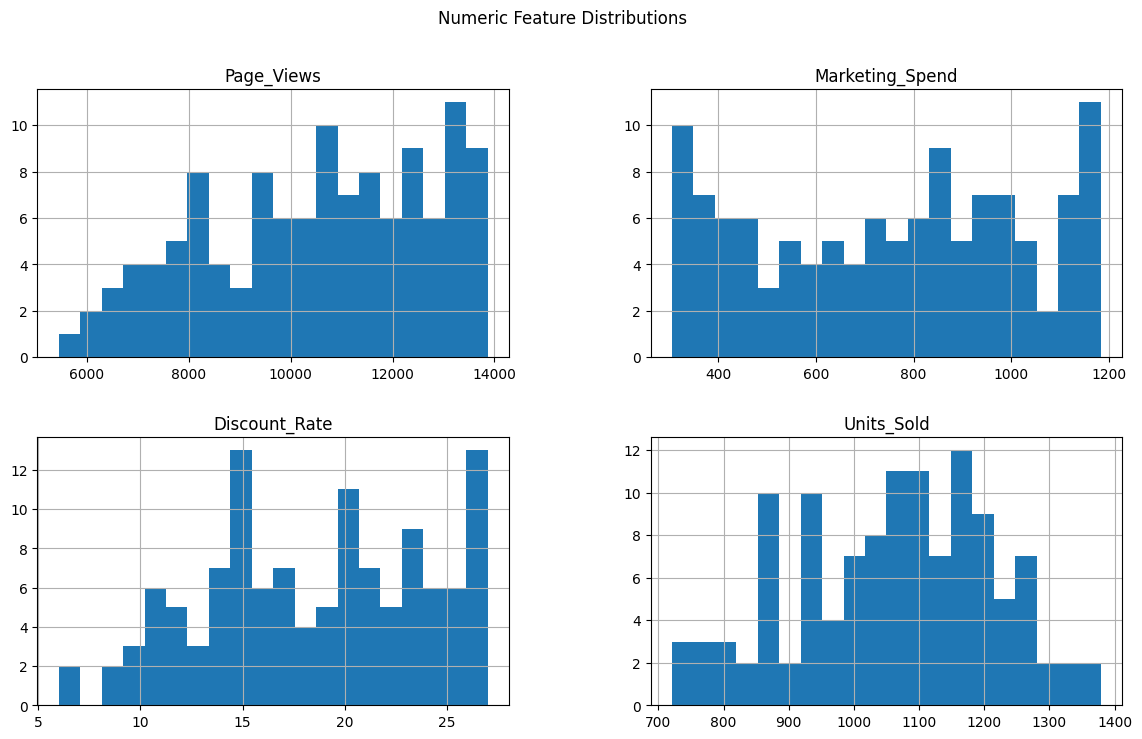

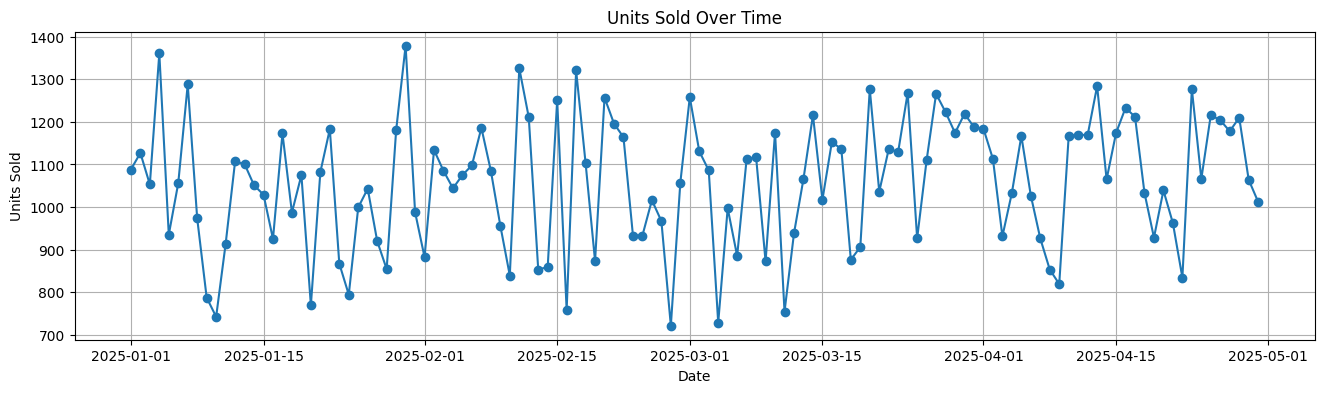

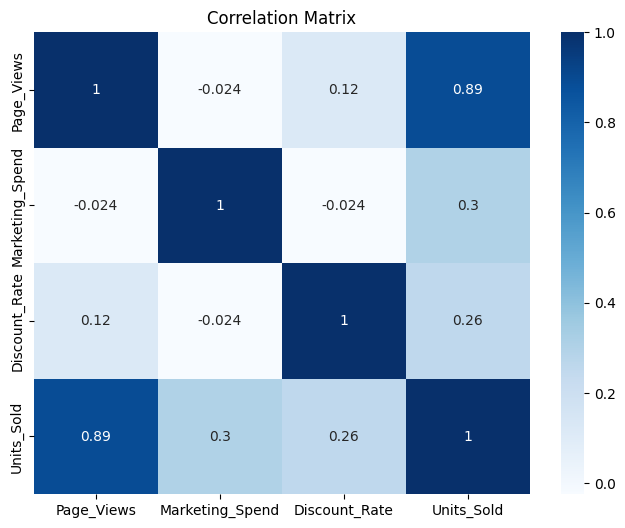

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Dataset
# Make sure the file name and path are correct. Update if your file is in a different location.
df = pd.read_csv('ecommerce_amazon_dataset.csv', parse_dates=['Date'])

# 2. Basic Dataset Info
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# 3. Check Missing Values
print("\nMissing values per column:\n", df.isnull().sum())

# 4. Basic Descriptive Statistics
print("\nSummary statistics:\n", df.describe())

# 5. Visualize Distributions
numeric_cols = ['Page_Views', 'Marketing_Spend', 'Discount_Rate', 'Units_Sold']
df[numeric_cols].hist(bins=20, figsize=(14, 8))
plt.suptitle('Numeric Feature Distributions')
plt.show()

# 6. Time Series Plot for Units Sold
plt.figure(figsize=(16, 4))
plt.plot(df['Date'], df['Units_Sold'], marker='o')
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# 7. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

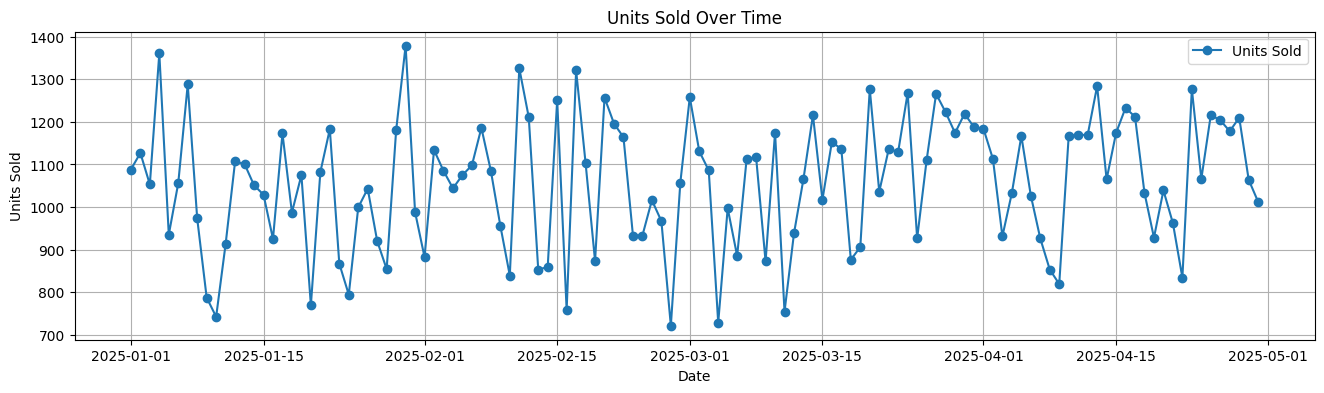

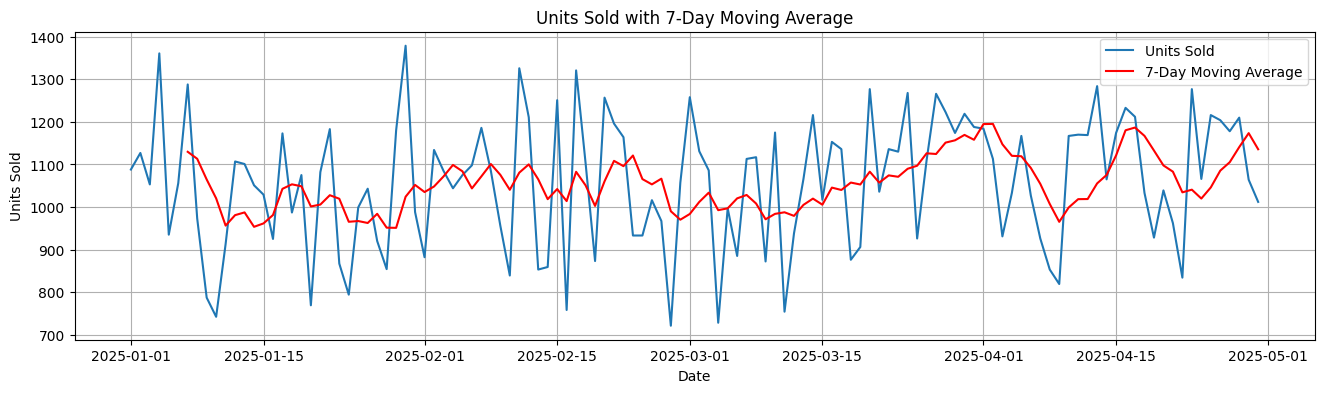

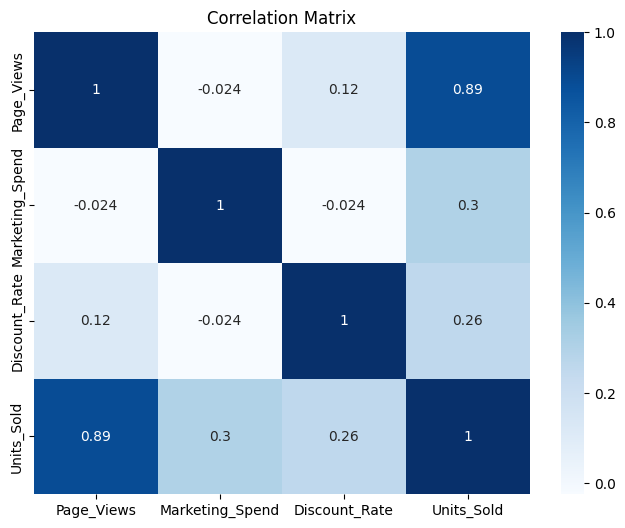

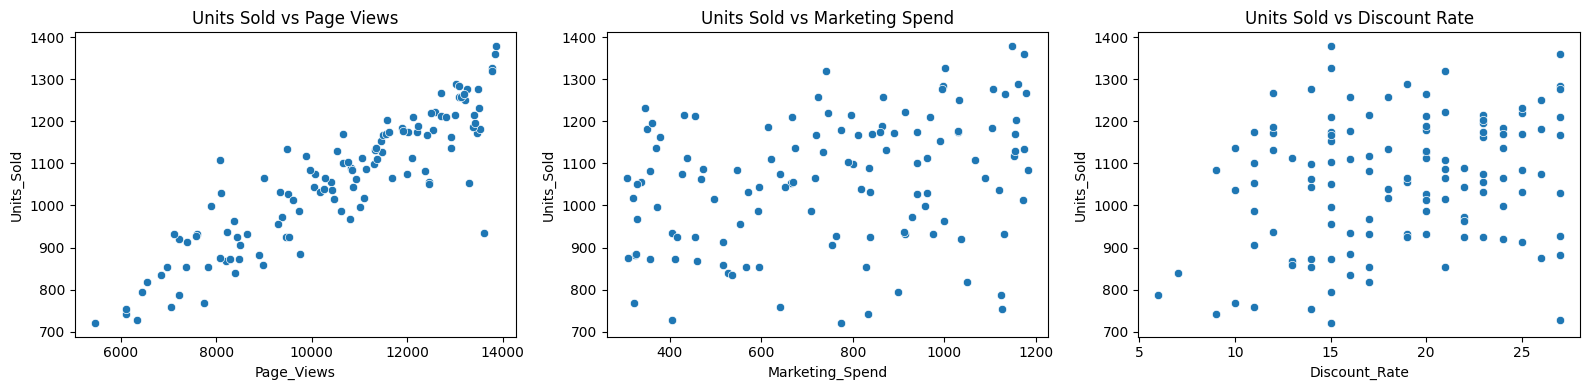

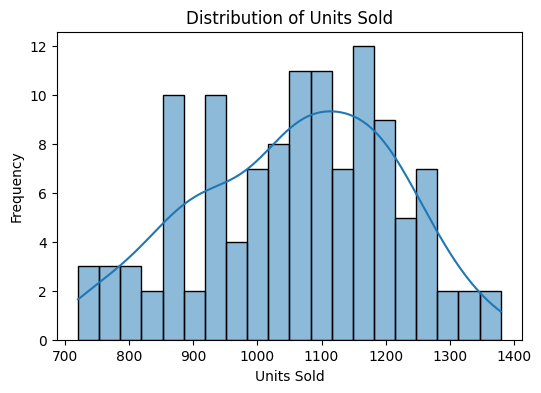

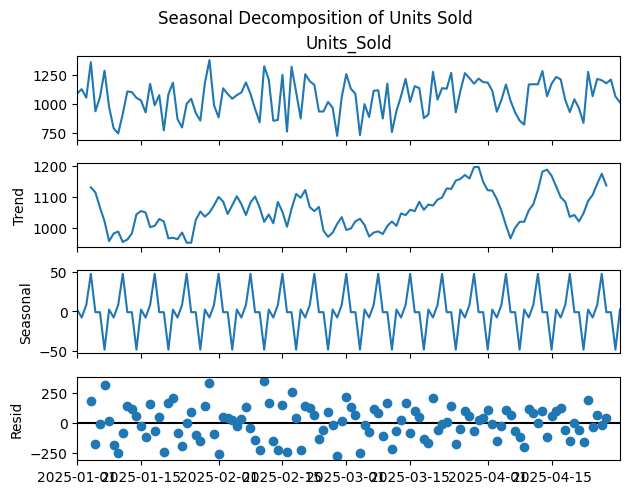

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Time Series Overview (Trend & Seasonality) ---
plt.figure(figsize=(16, 4))
plt.plot(df['Date'], df['Units_Sold'], marker='o', label='Units Sold')
plt.title('Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)
plt.show()

# --- 2. Moving Average ---
df['Units_Sold_MA7'] = df['Units_Sold'].rolling(window=7).mean()
plt.figure(figsize=(16, 4))
plt.plot(df['Date'], df['Units_Sold'], label='Units Sold')
plt.plot(df['Date'], df['Units_Sold_MA7'], label='7-Day Moving Average', color='red')
plt.title('Units Sold with 7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)
plt.show()

# --- 3. Correlation Analysis ---
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Page_Views', 'Marketing_Spend', 'Discount_Rate', 'Units_Sold']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

# --- 4. Scatter Plots ---
plt.figure(figsize=(16, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Page_Views', y='Units_Sold', data=df)
plt.title('Units Sold vs Page Views')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Marketing_Spend', y='Units_Sold', data=df)
plt.title('Units Sold vs Marketing Spend')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Discount_Rate', y='Units_Sold', data=df)
plt.title('Units Sold vs Discount Rate')

plt.tight_layout()
plt.show()

# --- 5. Distribution of Target Variable ---
plt.figure(figsize=(6, 4))
sns.histplot(df['Units_Sold'], bins=20, kde=True)
plt.title('Distribution of Units Sold')
plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.show()

# --- 6. Seasonal Decomposition (Optional) ---
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure Date is set as index and sorted
df_sorted = df.sort_values('Date').set_index('Date')
result = seasonal_decompose(df_sorted['Units_Sold'], model='additive', period=7)
result.plot()
plt.suptitle('Seasonal Decomposition of Units Sold', y=1.02)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Ensure the DataFrame is sorted by Date for time series operations
df = df.sort_values('Date').reset_index(drop=True)

# --- 1. Date-Time Features ---
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['Is_Weekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# --- 2. Lag Features (Previous period sales) ---
# Shift Units_Sold by 1, 7, 14 days to capture past sales
df['Units_Sold_Lag1'] = df['Units_Sold'].shift(1)
df['Units_Sold_Lag7'] = df['Units_Sold'].shift(7)
df['Units_Sold_Lag14'] = df['Units_Sold'].shift(14)

# --- 3. Rolling Window Features (Moving averages and std deviations) ---
df['Units_Sold_MA7'] = df['Units_Sold'].rolling(window=7).mean()
df['Units_Sold_MA14'] = df['Units_Sold'].rolling(window=14).mean()
df['Units_Sold_STD7'] = df['Units_Sold'].rolling(window=7).std()
df['Units_Sold_STD14'] = df['Units_Sold'].rolling(window=14).std()

# --- 4. Expanding Window Features (Cumulative stats) ---
df['Units_Sold_CumMean'] = df['Units_Sold'].expanding().mean()
df['Units_Sold_CumSum'] = df['Units_Sold'].expanding().sum()

# --- 5. Interaction Features (Optional) ---
df['Marketing_per_Unit'] = df['Marketing_Spend'] / (df['Units_Sold'] + 1e-5)  # Avoid division by zero
df['Views_per_Unit'] = df['Page_Views'] / (df['Units_Sold'] + 1e-5)

# --- 6. Special Days/Holidays (Optional) ---
# If you have a list of holidays, you can mark them. Here’s an example for weekends:
# For real holidays, you can use the 'holidays' package or add your own.
# df['Is_Holiday'] = df['Date'].isin(holiday_list).astype(int)

# --- 7. Drop NA rows caused by shifting/rolling (important before modeling) ---
df_fe = df.dropna().reset_index(drop=True)

# Preview the engineered features
print(df_fe.head())

        Date  Page_Views  Marketing_Spend  Discount_Rate  Units_Sold  \
0 2025-01-15        8104              963             27        1029   
1 2025-01-16        9452              416             22         925   
2 2025-01-17       13457              890             12        1173   
3 2025-01-18       10616              594             11         987   
4 2025-01-19       10069              641             26        1075   

   Units_Sold_MA7  Year  Month  Day  DayOfWeek  ...  Units_Sold_Lag1  \
0      961.428571  2025      1   15          2  ...           1051.0   
1      981.142857  2025      1   16          3  ...           1029.0   
2     1042.714286  2025      1   17          4  ...            925.0   
3     1053.285714  2025      1   18          5  ...           1173.0   
4     1048.714286  2025      1   19          6  ...            987.0   

   Units_Sold_Lag7  Units_Sold_Lag14  Units_Sold_MA14  Units_Sold_STD7  \
0            973.0            1088.0      1037.357143       

Missing values per column:
 Date                  0
Page_Views            0
Marketing_Spend       0
Discount_Rate         0
Units_Sold            0
Units_Sold_MA7        0
Year                  0
Month                 0
Day                   0
DayOfWeek             0
Is_Weekend            0
Units_Sold_Lag1       0
Units_Sold_Lag7       0
Units_Sold_Lag14      0
Units_Sold_MA14       0
Units_Sold_STD7       0
Units_Sold_STD14      0
Units_Sold_CumMean    0
Units_Sold_CumSum     0
Marketing_per_Unit    0
Views_per_Unit        0
dtype: int64


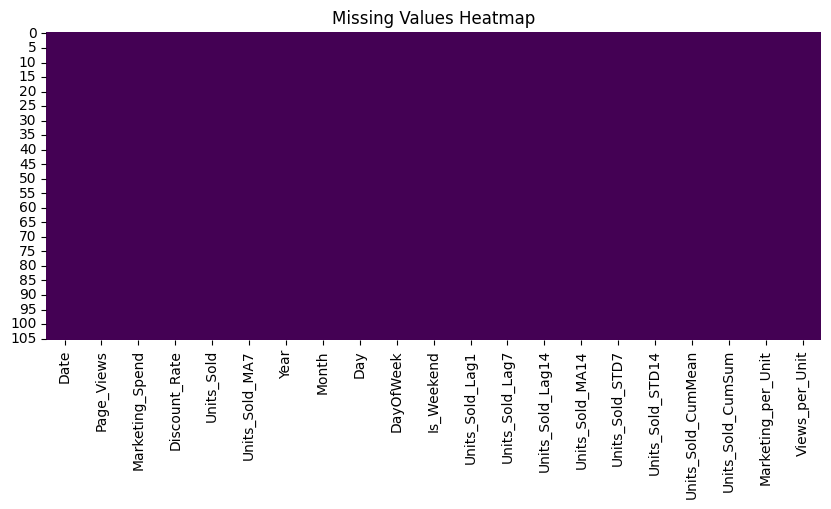

Missing values after fill:
 Date                  0
Page_Views            0
Marketing_Spend       0
Discount_Rate         0
Units_Sold            0
Units_Sold_MA7        0
Year                  0
Month                 0
Day                   0
DayOfWeek             0
Is_Weekend            0
Units_Sold_Lag1       0
Units_Sold_Lag7       0
Units_Sold_Lag14      0
Units_Sold_MA14       0
Units_Sold_STD7       0
Units_Sold_STD14      0
Units_Sold_CumMean    0
Units_Sold_CumSum     0
Marketing_per_Unit    0
Views_per_Unit        0
dtype: int64


In [ ]:
# 1. Check missing values again
print("Missing values per column:\n", df_fe.isnull().sum())

# 2. Visualize missing values (optional, helpful if many features)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.heatmap(df_fe.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Forward Fill (propagate last valid value forward)
df_ffill = df_fe.ffill()

# Backward Fill (use next valid value to fill)
df_bfill = df_fe.bfill()

# 5. Interpolation (linear by default, good for time series)
df_interp = df_fe.interpolate(method='linear')

# 6. Imputation with a constant (e.g., zero)
df_zero = df_fe.fillna(0)

# 7. Choose your preferred method for the rest of your workflow
# For time series, forward fill is often preferred, especially for lags and rolling features.
df_final = df_ffill

# 8. Confirm that missing values are handled
print("Missing values after fill:\n", df_final.isnull().sum())

In [ ]:
# Assume data is sorted by 'Date'
test_size = 0.2  # Use last 20% as test set
split_index = int(len(df_final) * (1 - test_size))

train = df_final.iloc[:split_index]
test = df_final.iloc[split_index:]

print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Train period:", train['Date'].min(), "to", train['Date'].max())
print("Test period:", test['Date'].min(), "to", test['Date'].max())

Train shape: (84, 21)
Test shape: (22, 21)
Train period: 2025-01-15 00:00:00 to 2025-04-08 00:00:00
Test period: 2025-04-09 00:00:00 to 2025-04-30 00:00:00


In [ ]:
# Set 'Date' as the index for resampling
df_final = df_final.set_index('Date')

# Resample to weekly frequency, summing numeric columns (e.g., sales, marketing spend, etc.)
df_weekly = df_final.resample('W').sum()

# If you want to keep some columns as mean (like Discount_Rate), you can do:
df_weekly['Discount_Rate'] = df_final['Discount_Rate'].resample('W').mean()

# Reset index if you want 'Date' as a column again
df_weekly = df_weekly.reset_index()

print(df_weekly.head())

        Date  Page_Views  Marketing_Spend  Discount_Rate  Units_Sold  \
0 2025-01-19       51698             3504      19.600000        5189   
1 2025-01-26       67039             3942      17.000000        6737   
2 2025-02-02       69086             5735      20.142857        7337   
3 2025-02-09       76852             4780      17.142857        7529   
4 2025-02-16       71336             5283      16.142857        7097   

   Units_Sold_MA7   Year  Month  Day  DayOfWeek  ...  Units_Sold_Lag1  \
0     5087.285714  10125      5   85         20  ...           5165.0   
1     6948.857143  14175      7  161         21  ...           6769.0   
2     7045.714286  14175      9  148         21  ...           7246.0   
3     7546.714286  14175     14   42         21  ...           7707.0   
4     7360.857143  14175     14   91         21  ...           7295.0   

   Units_Sold_Lag7  Units_Sold_Lag14  Units_Sold_MA14  Units_Sold_STD7  \
0           4522.0            5564.0      5111.357143 

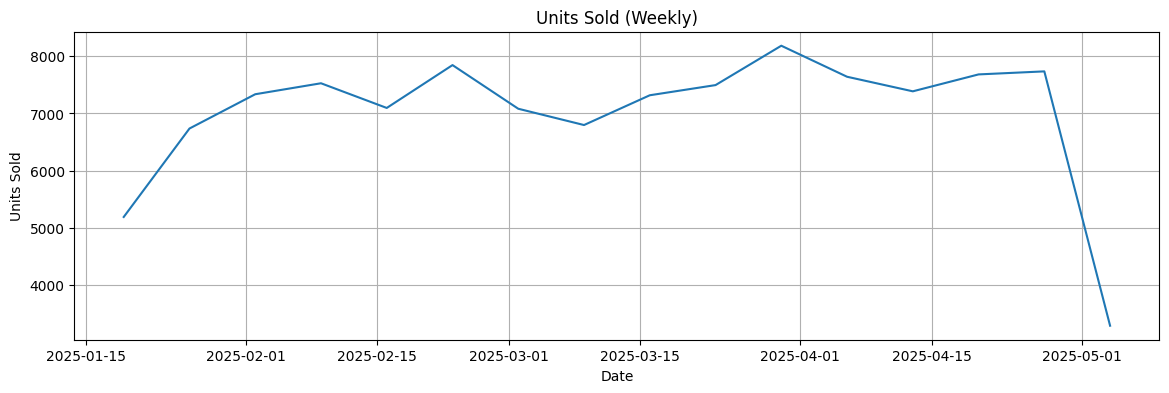

ADF Statistic: -1.3527487081981673
p-value: 0.6047078680137842
Critial Values:
   1%, -4.331573
Critial Values:
   5%, -3.23295
Critial Values:
   10%, -2.7487
ADF test: Series is likely non-stationary (p > 0.05)
KPSS Statistic: 0.14302793079838141
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS test: Series is likely stationary (p ≥ 0.05)


<ipython-input-8-f80bdcdecf53>:28: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(series, **kw)


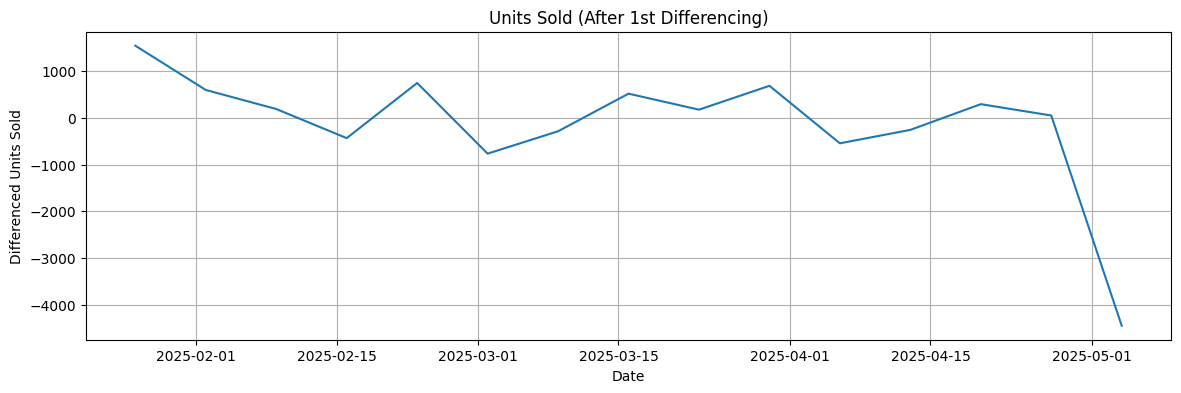


--- ADF Test after Differencing ---
ADF Statistic: -1.5005861289832032
p-value: 0.5332213693806889
Critial Values:
   1%, -4.01203360058309
Critial Values:
   5%, -3.1041838775510207
Critial Values:
   10%, -2.6909873469387753
ADF test: Differenced series is likely non-stationary (p > 0.05)

--- KPSS Test after Differencing ---
KPSS Statistic: 0.401149035597796
p-value: 0.07665989844922586
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
KPSS test: Series is likely stationary (p ≥ 0.05)


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss

# --- 1. Plot Units_Sold to visually inspect for trend/seasonality ---
plt.figure(figsize=(14,4))
plt.plot(df_weekly['Date'], df_weekly['Units_Sold'])
plt.title('Units Sold (Weekly)')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

# --- 2. ADF Test (Null Hypothesis: Series is non-stationary) ---
result_adf = adfuller(df_weekly['Units_Sold'])
print('ADF Statistic:', result_adf[0])
print('p-value:', result_adf[1])
for key, value in result_adf[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

if result_adf[1] > 0.05:
    print("ADF test: Series is likely non-stationary (p > 0.05)")
else:
    print("ADF test: Series is likely stationary (p ≤ 0.05)")

# --- 3. KPSS Test (Null Hypothesis: Series is stationary) ---
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'Critical Values: {critical_values}')
    if p_value < 0.05:
        print("KPSS test: Series is likely non-stationary (p < 0.05)")
    else:
        print("KPSS test: Series is likely stationary (p ≥ 0.05)")

kpss_test(df_weekly['Units_Sold'], regression='c')

# --- 4. Differencing if necessary ---
# If either test suggests non-stationarity, apply first differencing
df_weekly['Units_Sold_diff1'] = df_weekly['Units_Sold'].diff()

plt.figure(figsize=(14,4))
plt.plot(df_weekly['Date'], df_weekly['Units_Sold_diff1'])
plt.title('Units Sold (After 1st Differencing)')
plt.xlabel('Date')
plt.ylabel('Differenced Units Sold')
plt.grid(True)
plt.show()

# --- 5. Re-test stationarity on differenced series ---
# Drop NA from differencing for tests
diff1 = df_weekly['Units_Sold_diff1'].dropna()

print("\n--- ADF Test after Differencing ---")
result_adf_diff = adfuller(diff1)
print('ADF Statistic:', result_adf_diff[0])
print('p-value:', result_adf_diff[1])
for key, value in result_adf_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
if result_adf_diff[1] > 0.05:
    print("ADF test: Differenced series is likely non-stationary (p > 0.05)")
else:
    print("ADF test: Differenced series is likely stationary (p ≤ 0.05)")

print("\n--- KPSS Test after Differencing ---")
kpss_test(diff1, regression='c')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 1. Select columns to scale (exclude 'Date' and target variable 'Units_Sold' or differenced version if forecasting)
to_scale = [col for col in df_weekly.columns if col not in ['Date', 'Units_Sold', 'Units_Sold_diff1']]

# 2. Standard Scaler (zero mean, unit variance)
scaler_standard = StandardScaler()
df_weekly_standard = df_weekly.copy()
df_weekly_standard[to_scale] = scaler_standard.fit_transform(df_weekly_standard[to_scale])

# 3. MinMax Scaler (scales to [0, 1])
scaler_minmax = MinMaxScaler()
df_weekly_minmax = df_weekly.copy()
df_weekly_minmax[to_scale] = scaler_minmax.fit_transform(df_weekly_minmax[to_scale])

# 4. Check results
print("Standard Scaled Sample:\n", df_weekly_standard.head())
print("\nMinMax Scaled Sample:\n", df_weekly_minmax.head())

Standard Scaled Sample:
         Date  Page_Views  Marketing_Spend  Discount_Rate  Units_Sold  \
0 2025-01-19   -1.538782        -1.223732       0.485342        5189   
1 2025-01-26   -0.220607        -0.852802      -0.780314        6737   
2 2025-02-02   -0.044719         0.665643       0.749600        7337   
3 2025-02-09    0.622575        -0.143122      -0.710772        7529   
4 2025-02-16    0.148613         0.282856      -1.197563        7097   

   Units_Sold_MA7      Year     Month       Day  DayOfWeek  ...  \
0       -1.705920 -1.542816 -1.740272 -0.554942   0.043126  ...   
1       -0.048384  0.356034 -1.469939  1.140560   0.273134  ...   
2        0.037858  0.356034 -1.199605  0.850540   0.273134  ...   
3        0.483946  0.356034 -0.523771 -1.514239   0.273134  ...   
4        0.318460  0.356034 -0.523771 -0.421087   0.273134  ...   

   Units_Sold_Lag7  Units_Sold_Lag14  Units_Sold_MA14  Units_Sold_STD7  \
0        -1.911771         -1.329284        -1.658963        -1.4

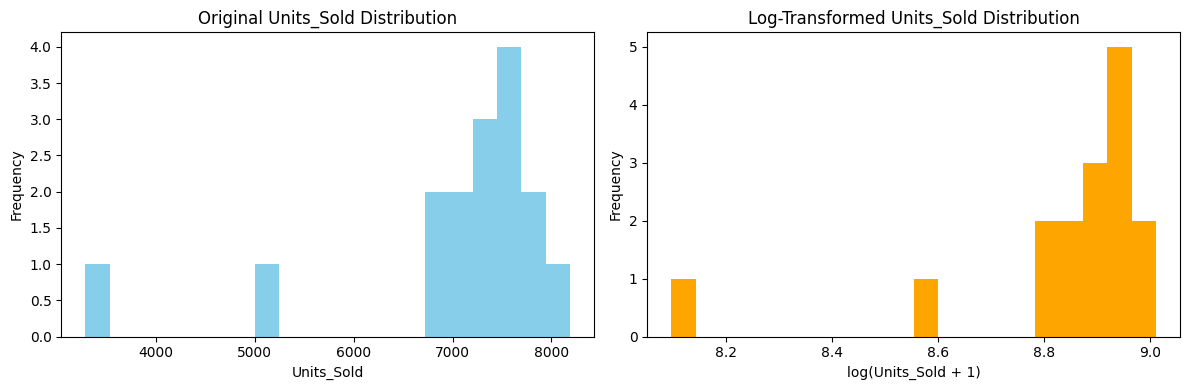

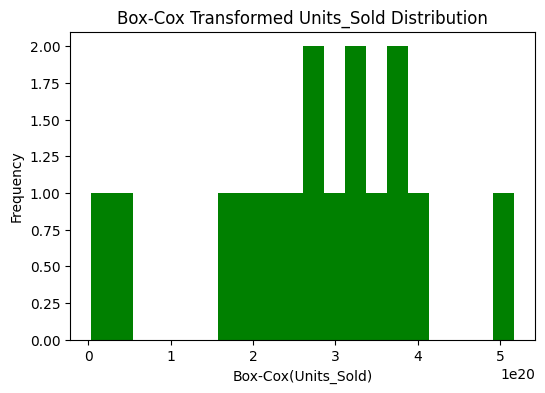

Box-Cox lambda used: 5.482163653879416


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 1. Visualize the distribution of the target (Units_Sold or Units_Sold_diff1)
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.hist(df_weekly['Units_Sold'].dropna(), bins=20, color='skyblue')
plt.title('Original Units_Sold Distribution')
plt.xlabel('Units_Sold')
plt.ylabel('Frequency')

# 2. Log-transform the target (add 1 to avoid log(0))
df_weekly['Units_Sold_log'] = np.log1p(df_weekly['Units_Sold'])

plt.subplot(1, 2, 2)
plt.hist(df_weekly['Units_Sold_log'].dropna(), bins=20, color='orange')
plt.title('Log-Transformed Units_Sold Distribution')
plt.xlabel('log(Units_Sold + 1)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Optional: Box-Cox transformation (requires strictly positive values)
# Only use on strictly positive data
units_sold_positive = df_weekly['Units_Sold'][df_weekly['Units_Sold'] > 0]
df_weekly.loc[df_weekly['Units_Sold'] > 0, 'Units_Sold_boxcox'], fitted_lambda = stats.boxcox(units_sold_positive)

plt.figure(figsize=(6,4))
plt.hist(df_weekly['Units_Sold_boxcox'].dropna(), bins=20, color='green')
plt.title('Box-Cox Transformed Units_Sold Distribution')
plt.xlabel('Box-Cox(Units_Sold)')
plt.ylabel('Frequency')
plt.show()

print("Box-Cox lambda used:", fitted_lambda)

In [ ]:
# --- Classical Time Series Models ---
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from prophet import Prophet

# --- ML Models ---
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# --- Deep Learning ---
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU
from keras.optimizers import Adam
# Ensure Keras backend is set up if needed, not shown here but good practice

# --- Data Preparation ---
# Use your processed weekly data, pick the target (e.g., 'Units_Sold_log' or 'Units_Sold_boxcox')
# Using 'Units_Sold_log' as chosen previously
target_col = 'Units_Sold_log'
# Ensure feature_cols excludes target and date columns, including transformations
feature_cols = [col for col in df_weekly.columns if col not in ['Date', 'Units_Sold', 'Units_Sold_log', 'Units_Sold_boxcox', 'Units_Sold_diff1']]

X = df_weekly[feature_cols].values
y = df_weekly[target_col].values

# Split (e.g., 80% train, 20% test)
split_idx = int(0.8 * len(df_weekly))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]
dates_train, dates_test = df_weekly['Date'].values[:split_idx], df_weekly['Date'].values[split_idx:]

# Print shapes to confirm the split
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


# --- 1. ARIMA (Univariate, needs 1D y) ---
# Ensure order (p, d, q) is appropriate. (1,1,1) is a common starting point if differencing (d=1) helped stationarity.
# If you used log transformation but no differencing on the log series, maybe order=(p,0,q).
# Given the limited data, complex orders might overfit.
try:
    arima_model = ARIMA(y_train, order=(1,1,1)).fit()
    y_pred_arima = arima_model.forecast(steps=len(y_test))
    print("ARIMA model fitted.")
except Exception as e:
    print(f"ARIMA failed: {e}")
    y_pred_arima = np.full(len(y_test), np.nan) # Fill with NaN if model fails


# --- 2. SARIMA (Univariate, with seasonality) ---
# With very limited data, modeling seasonality is challenging.
# Let's skip SARIMA or use a much smaller seasonal period if justified by the data.
# Given only 12 training points, seasonal_periods=52 is impossible.
# If you suspect e.g., monthly seasonality (4 weeks), you *could* try seasonal_order=(P,D,Q,4),
# but 12 points isn't ideal even for that. Let's skip SARIMA for now due to data limitations.
# try:
#     sarima_model = SARIMAX(y_train, order=(1,1,1), seasonal_order=(0,0,0,0)).fit() # Remove seasonality
#     y_pred_sarima = sarima_model.forecast(steps=len(y_test))
# except Exception as e:
#      print(f"SARIMA failed: {e}")
#      y_pred_sarima = np.full(len(y_test), np.nan)

# --- 3. Exponential Smoothing ---
# Remove seasonal components as seasonal_periods=52 is not feasible with 12 training points.
# We will fit a model with trend but no seasonality.
try:
    hw_model = ExponentialSmoothing(y_train, trend='add', seasonal=None).fit()
    y_pred_hw = hw_model.forecast(steps=len(y_test))
    print("Holt-Winters model fitted (no seasonality).")
except Exception as e:
     print(f"Holt-Winters failed: {e}")
     y_pred_hw = np.full(len(y_test), np.nan)


# --- 4. Prophet (for time series dataframe) ---
# Prophet can handle seasonality automatically, but still performs better with more data.
# Provide the original weekly dataframe with Date column
df_prophet = df_weekly[['Date', target_col]].rename(columns={'Date': 'ds', target_col: 'y'}).dropna() # Drop NA just in case

# Split the prophet dataframe
df_prophet_train = df_prophet.iloc[:split_idx]
df_prophet_test = df_prophet.iloc[split_idx:] # This will be used for ground truth in evaluation

try:
    prophet = Prophet(weekly_seasonality=True, yearly_seasonality=False) # Keep weekly, disable yearly as we lack data
    # If you have enough data (more than 2 years), enable yearly_seasonality=True
    prophet.fit(df_prophet_train)
    future = prophet.make_future_dataframe(periods=len(df_prophet_test), freq='W')
    forecast = prophet.predict(future)
    # Extract predictions corresponding to the test set dates
    y_pred_prophet = forecast['yhat'].values[-len(y_test):] # Get the last len(y_test) predictions
    print("Prophet model fitted.")
except Exception as e:
     print(f"Prophet failed: {e}")
     y_pred_prophet = np.full(len(y_test), np.nan) # Fill with NaN if model fails


# --- Prepare data for ML/DL models ---
# Need to handle potential NaNs introduced by lag/rolling features before splitting.
# Ensure X_train, y_train, X_test, y_test are derived from df_weekly *after* handling NaNs from FE
# Your previous code used df_fe, then df_final after filling NaNs, then resampled to df_weekly.
# Let's assume df_weekly is the dataframe *after* all feature engineering and resampling,
# and that it has no NaNs in the feature/target columns used here.

# --- 5. Random Forest ---
try:
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    print("Random Forest model fitted.")
except Exception as e:
     print(f"Random Forest failed: {e}")
     y_pred_rf = np.full(len(y_test), np.nan)


# --- 6. XGBoost ---
try:
    xgb = XGBRegressor(n_estimators=100, random_state=42)
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    print("XGBoost model fitted.")
except Exception as e:
     print(f"XGBoost failed: {e}")
     y_pred_xgb = np.full(len(y_test), np.nan)


# --- 7. LightGBM ---
try:
    lgbm = LGBMRegressor(n_estimators=100, random_state=42)
    lgbm.fit(X_train, y_train)
    y_pred_lgbm = lgbm.predict(X_test)
    print("LightGBM model fitted.")
except Exception as e:
     print(f"LightGBM failed: {e}")
     y_pred_lgbm = np.full(len(y_test), np.nan)


# --- 8. CatBoost ---
try:
    # Ensure catboost is installed: !pip install catboost
    catb = CatBoostRegressor(n_estimators=100, verbose=0, random_state=42)
    catb.fit(X_train, y_train)
    y_pred_catb = catb.predict(X_test)
    print("CatBoost model fitted.")
except Exception as e:
     print(f"CatBoost failed: {e}")
     y_pred_catb = np.full(len(y_test), np.nan)


# --- 9. LSTM (Deep Learning) ---
# Reshape for LSTM: (samples, timesteps, features)
# With a simple setup, timesteps is often 1. For sequence models, you might need more complex data prep.
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Ensure Keras/TensorFlow is imported and available
try:
    model_lstm = Sequential()
    model_lstm.add(LSTM(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))) # input_shape should be (timesteps, features)
    model_lstm.add(Dense(1))
    model_lstm.compile(optimizer=Adam(), loss='mse')
    # Use validation split for early stopping if dataset size permits
    model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=8, verbose=0) # Increased epochs, reduced verbosity
    y_pred_lstm = model_lstm.predict(X_test_lstm).flatten()
    print("LSTM model fitted.")
except Exception as e:
     print(f"LSTM failed: {e}")
     y_pred_lstm = np.full(len(y_test), np.nan)


# --- 10. GRU (Deep Learning) ---
try:
    model_gru = Sequential()
    model_gru.add(GRU(50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]))) # input_shape should be (timesteps, features)
    model_gru.add(Dense(1))
    model_gru.compile(optimizer=Adam(), loss='mse')
    model_gru.fit(X_train_lstm, y_train, epochs=50, batch_size=8, verbose=0) # Increased epochs, reduced verbosity
    y_pred_gru = model_gru.predict(X_test_lstm).flatten()
    print("GRU model fitted.")
except Exception as e:
     print(f"GRU failed: {e}")
     y_pred_gru = np.full(len(y_test), np.nan)


# --- Evaluation Example (R^2, MSE) ---
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "ARIMA": y_pred_arima,
    # "SARIMA": y_pred_sarima, # Skipped due to data length
    "Holt-Winters (no seasonality)": y_pred_hw,
    "Prophet": y_pred_prophet,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "LightGBM": y_pred_lgbm,
    "CatBoost": y_pred_catb,
    "LSTM": y_pred_lstm,
    "GRU": y_pred_gru
}

print("\n--- Model Evaluation ---")
for name, y_pred in models.items():
    # Check if prediction array contains NaNs before calculating metrics
    if np.isnan(y_pred).any():
         print(f"{name}: Model failed to train or predict, skipping evaluation.")
    else:
        # For models predicting on transformed target, metrics are on transformed scale
        # If comparing, you might want to inverse transform predictions first.
        # For this example, let's calculate on the transformed scale.
        try:
            mse = mean_squared_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            print(f"{name} - R2: {r2:.3f}, MSE: {mse:.3f}")
        except Exception as e:
            print(f"{name}: Error during evaluation - {e}")

# --- Inverse Transform (Optional, for interpretable metrics or visualization) ---
# If target_col was 'Units_Sold_log', inverse transform with np.expm1
# If target_col was 'Units_Sold_boxcox', inverse transform using stats.boxcox_ienv
# Example for log transform:
# y_test_orig = np.expm1(y_test)
# y_pred_arima_orig = np.expm1(y_pred_arima) # Assuming ARIMA worked
# print(f"\nARIMA (Original Scale) - R2: {r2_score(y_test_orig, y_pred_arima_orig):.3f}, MSE: {mean_squared_error(y_test_orig, y_pred_arima_orig):.3f}")
# Do this for each model if needed for comparison on original scale.

X_train shape: (12, 19)
y_train shape: (12,)
X_test shape: (4, 19)
y_test shape: (4,)
ARIMA model fitted.
Holt-Winters model fitted (no seasonality).


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplljc03g5/bnx41tee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplljc03g5/7szve319.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69488', 'data', 'file=/tmp/tmplljc03g5/bnx41tee.json', 'init=/tmp/tmplljc03g5/7szve319.json', 'output', 'file=/tmp/tmplljc03g5/prophet_model4_4ls2i9/prophet_model-20250603141650.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:16:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:16:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Prophet model fitted.
Random Forest model fitted.
XGBoost model fitted.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 12, number of used features: 0
[LightGBM] [Info] Start training from score 8.874660
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warni

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


CatBoost model fitted.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
LSTM model fitted.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
GRU model fitted.

--- Model Evaluation ---
ARIMA - R2: -0.326, MSE: 0.175
Holt-Winters (no seasonality) - R2: -0.824, MSE: 0.241
Prophet - R2: -0.924, MSE: 0.254
Random Forest - R2: 0.278, MSE: 0.095
XGBoost - R2: 0.603, MSE: 0.053
LightGBM - R2: -0.166, MSE: 0.154
CatBoost - R2: 0.358, MSE: 0.085
LSTM - R2: -485.295, MSE: 64.257
GRU - R2: -424.309, MSE: 56.199


Model Performance Metrics:

ARIMA:
  MAE:   0.224
  RMSE:  0.419
  MAPE:  2.75%
  SMAPE: 2.62%

Holt-Winters (no seasonality):
  MAE:   0.310
  RMSE:  0.491
  MAPE:  3.75%
  SMAPE: 3.58%

Prophet:
  MAE:   0.323
  RMSE:  0.504
  MAPE:  3.90%
  SMAPE: 3.72%

Random Forest:
  MAE:   0.170
  RMSE:  0.309
  MAPE:  2.08%
  SMAPE: 2.01%

XGBoost:
  MAE:   0.122
  RMSE:  0.229
  MAPE:  1.50%
  SMAPE: 1.46%

LightGBM:
  MAE:   0.240
  RMSE:  0.393
  MAPE:  2.91%
  SMAPE: 2.81%

CatBoost:
  MAE:   0.157
  RMSE:  0.291
  MAPE:  1.93%
  SMAPE: 1.86%

LSTM:
  MAE:   8.008
  RMSE:  8.016
  MAPE:  91.75%
  SMAPE: 169.51%

GRU:
  MAE:   7.488
  RMSE:  7.497
  MAPE:  85.78%
  SMAPE: 150.21%



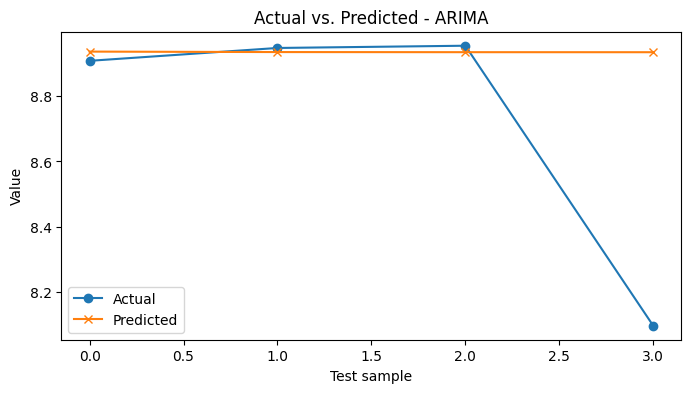

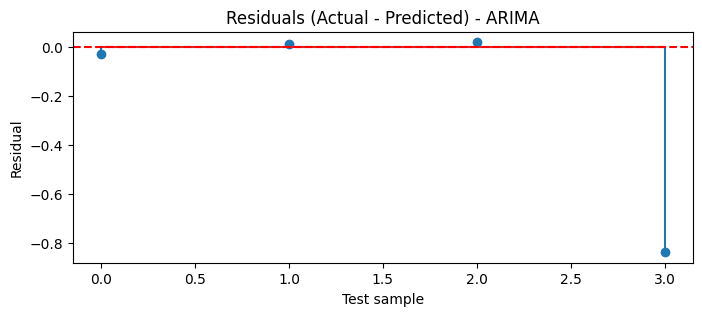

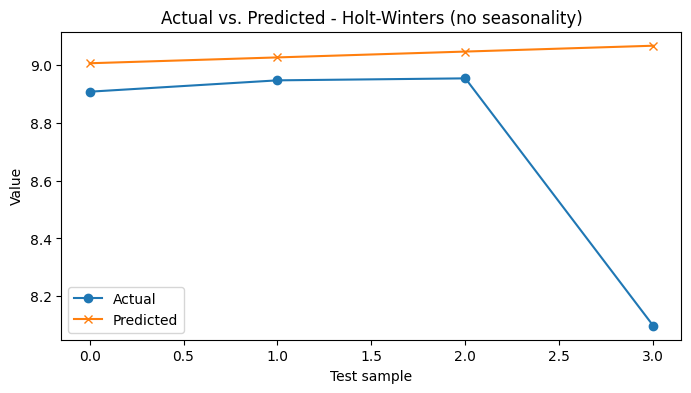

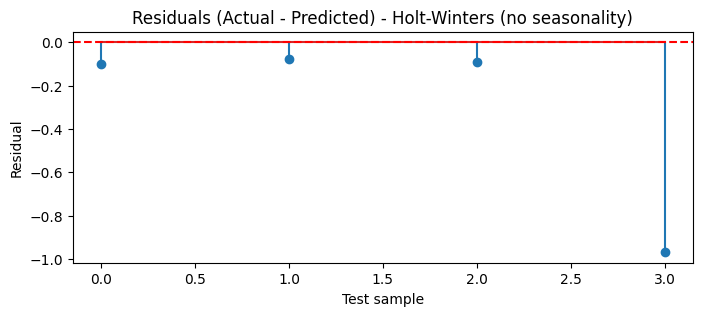

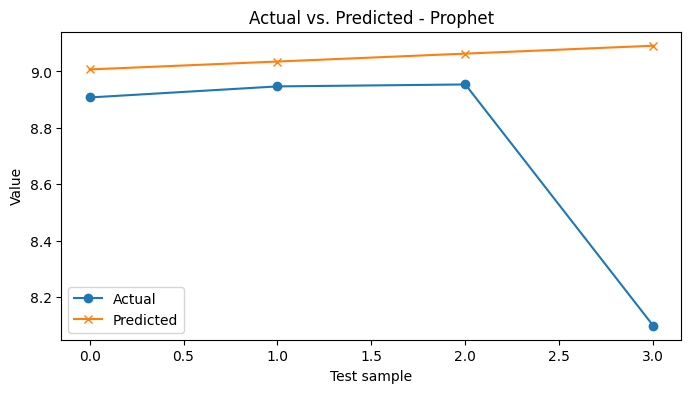

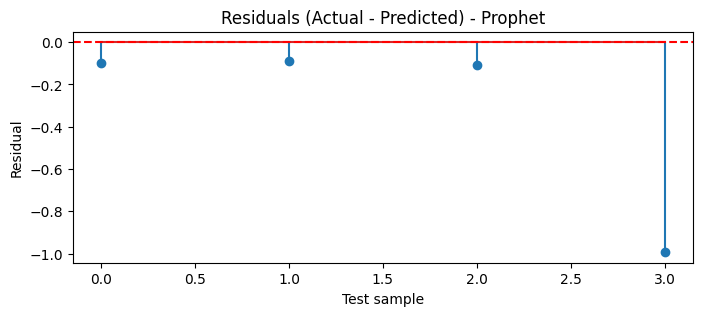

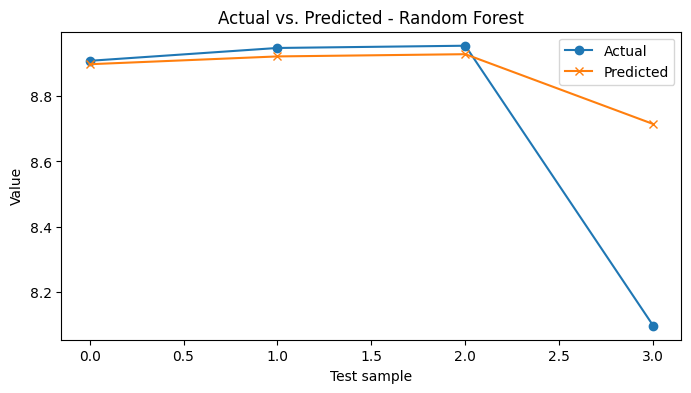

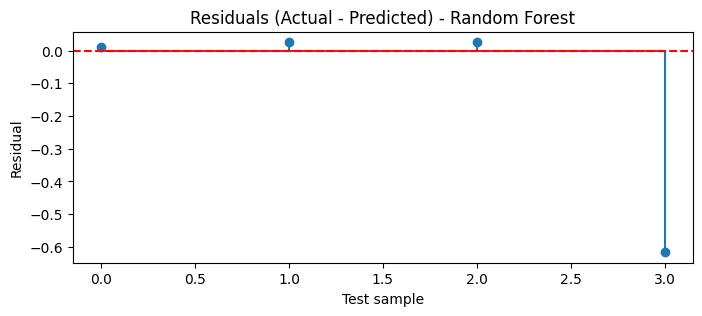

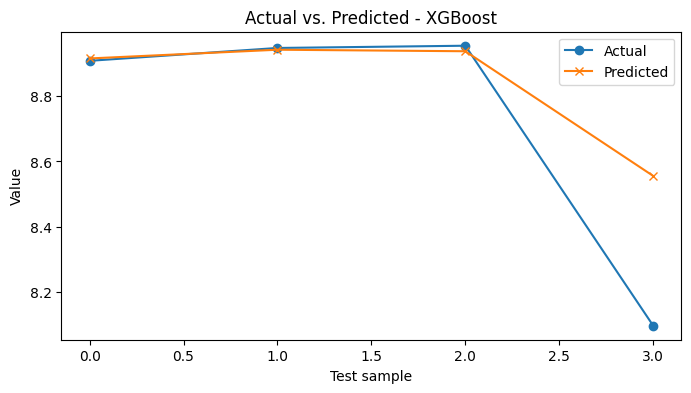

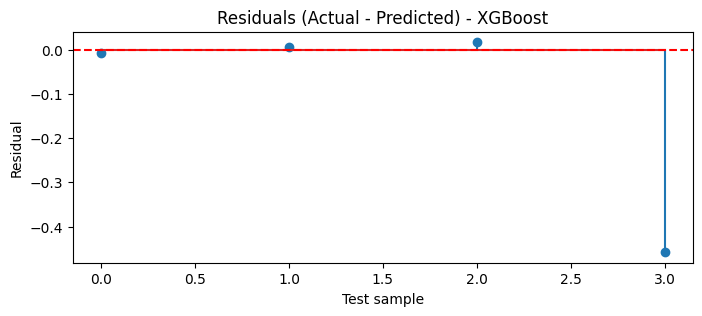

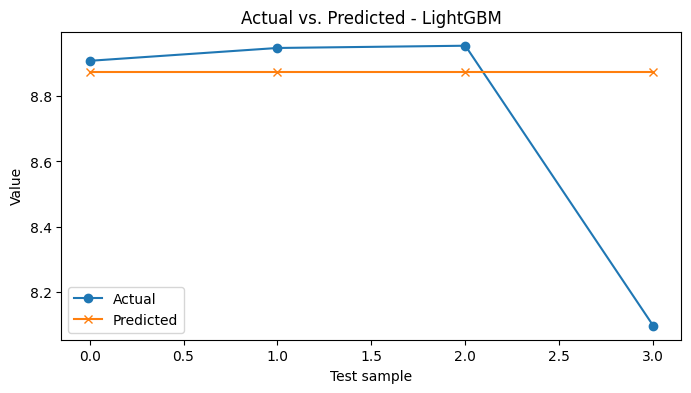

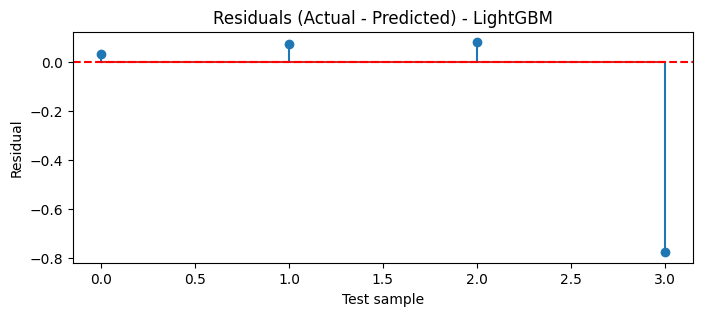

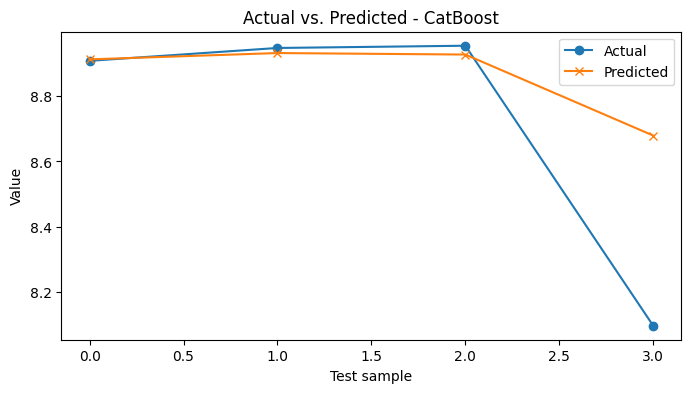

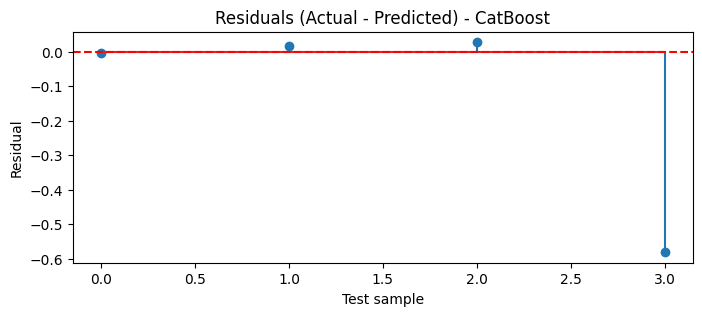

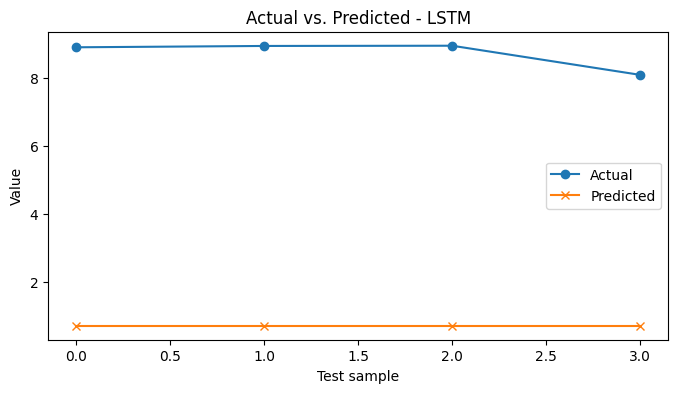

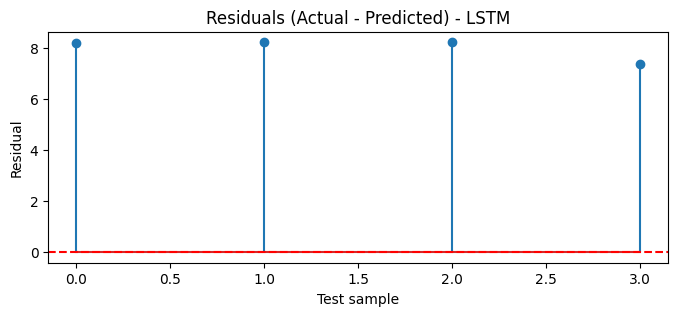

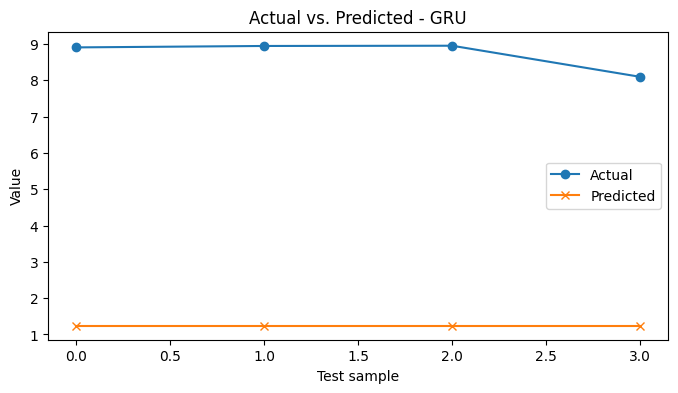

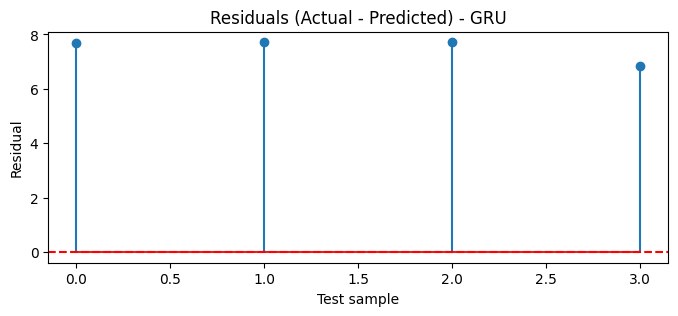

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mape(y_true, y_pred):
    y_true = np.where(y_true == 0, np.nan, y_true)
    return np.nanmean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    denominator = np.where(denominator == 0, np.nan, denominator)
    return np.nanmean(np.abs(y_true - y_pred) / denominator) * 100

print("Model Performance Metrics:\n")
for name, y_pred in models.items():
    # Check if prediction array contains NaNs before calculating metrics
    # This check is already present in the model fitting section, but good to be safe here too.
    if np.isnan(y_test).any() or np.isnan(y_pred).any():
         print(f"{name}: Skipping evaluation due to NaN values in test data or predictions.")
    else:
        try:
            print(f"{name}:")
            print(f"  MAE:   {mae(y_test, y_pred):.3f}")
            print(f"  RMSE:  {rmse(y_test, y_pred):.3f}")
            # Check for division by zero in MAPE/SMAPE if y_test contains zeros
            if (y_test == 0).any():
                 print(f"  MAPE:  Cannot calculate MAPE due to zeros in actual values.")
                 print(f"  SMAPE: {smape(y_test, y_pred):.2f}%\n")
            else:
                 print(f"  MAPE:  {mape(y_test, y_pred):.2f}%")
                 print(f"  SMAPE: {smape(y_test, y_pred):.2f}%\n")
        except Exception as e:
             print(f"{name}: Error during metric calculation - {e}")


# Visualization
for name, y_pred in models.items():
    if np.isnan(y_test).any() or np.isnan(y_pred).any():
        print(f"{name}: Skipping visualization due to NaN values.")
        continue
    try:
        plt.figure(figsize=(8,4))
        plt.plot(y_test, label='Actual', marker='o')
        plt.plot(y_pred, label='Predicted', marker='x')
        plt.title(f'Actual vs. Predicted - {name}')
        plt.legend()
        plt.xlabel('Test sample')
        plt.ylabel('Value')
        plt.show()

        # Residuals
        residuals = y_test - y_pred
        plt.figure(figsize=(8,3))
        # Removed the 'use_line_collection' argument
        plt.stem(residuals)
        plt.title(f'Residuals (Actual - Predicted) - {name}')
        plt.axhline(0, color='red', linestyle='--')
        plt.xlabel('Test sample')
        plt.ylabel('Residual')
        plt.show()
    except Exception as e:
        print(f"{name}: Error during visualization - {e}")

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

def sliding_window_backtest(model_cls, X, y, window_size, step=1, fit_kwargs=None, pred_kwargs=None):
    """
    model_cls: Class of the model, e.g., RandomForestRegressor
    X: Features (np.array or pd.DataFrame)
    y: Target (np.array or pd.Series)
    window_size: Size of the training window
    step: How many steps to move the window each iteration
    fit_kwargs: dict of kwargs for model.fit()
    pred_kwargs: dict of kwargs for model.predict()
    """
    n_samples = X.shape[0]
    preds = []
    trues = []
    fit_kwargs = fit_kwargs or {}
    pred_kwargs = pred_kwargs or {}

    for start in range(0, n_samples - window_size, step):
        end = start + window_size
        X_train, y_train = X[start:end], y[start:end]
        X_test, y_test = X[end:end+step], y[end:end+step]
        if len(X_test) == 0: break
        model = model_cls()
        model.fit(X_train, y_train, **fit_kwargs)
        y_pred = model.predict(X_test, **pred_kwargs)
        preds.extend(y_pred)
        trues.extend(y_test)
    return np.array(trues), np.array(preds)

# Example usage with Random Forest
window_size = 8  # or another value < len(X)
trues, preds = sliding_window_backtest(RandomForestRegressor, X, y, window_size)

print(f'Backtest MSE: {mean_squared_error(trues, preds):.3f}')

Backtest MSE: 0.078


In [ ]:
def expanding_window_backtest(model_cls, X, y, initial_train_size, step=1, fit_kwargs=None, pred_kwargs=None):
    n_samples = X.shape[0]
    preds = []
    trues = []
    fit_kwargs = fit_kwargs or {}
    pred_kwargs = pred_kwargs or {}

    for end in range(initial_train_size, n_samples - step + 1, step):
        X_train, y_train = X[:end], y[:end]
        X_test, y_test = X[end:end+step], y[end:end+step]
        model = model_cls()
        model.fit(X_train, y_train, **fit_kwargs)
        y_pred = model.predict(X_test, **pred_kwargs)
        preds.extend(y_pred)
        trues.extend(y_test)
    return np.array(trues), np.array(preds)

# Example usage:
initial_train_size = 8
trues, preds = expanding_window_backtest(RandomForestRegressor, X, y, initial_train_size)
print(f'Backtest MSE: {mean_squared_error(trues, preds):.3f}')

Backtest MSE: 0.044


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

def sliding_window_backtest_arima(y, window_size, order=(1,1,1), step=1):
    n_samples = len(y)
    preds = []
    trues = []
    for start in range(0, n_samples - window_size, step):
        end = start + window_size
        y_train = y[start:end]
        y_test = y[end:end+step]
        if len(y_test) == 0: break
        model = ARIMA(y_train, order=order).fit()
        forecast = model.forecast(steps=len(y_test))
        preds.extend(forecast)
        trues.extend(y_test)
    return np.array(trues), np.array(preds)

# Usage:
trues_arima, preds_arima = sliding_window_backtest_arima(y, window_size=8)
print(f'ARIMA Sliding Window Backtest MSE: {mean_squared_error(trues_arima, preds_arima):.3f}')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA Sliding Window Backtest MSE: 0.094


,R2,MAE,RMSE,MAPE,SMAPE
Model,,,,,
XGBoost,0.603,0.122,0.229,1.50,1.46
CatBoost,0.358,0.157,0.291,1.93,1.86
Random Forest,0.278,0.170,0.309,2.08,2.01
LightGBM,-0.166,0.240,0.393,2.91,2.81
ARIMA,-0.326,0.224,0.419,2.75,2.62
Holt-Winters (no seasonality),-0.824,0.310,0.491,3.75,3.58
Prophet,-0.924,0.323,0.504,3.90,3.72
GRU,-424.309,7.488,7.497,85.78,150.21
LSTM,-485.295,8.008,8.016,91.75,169.51


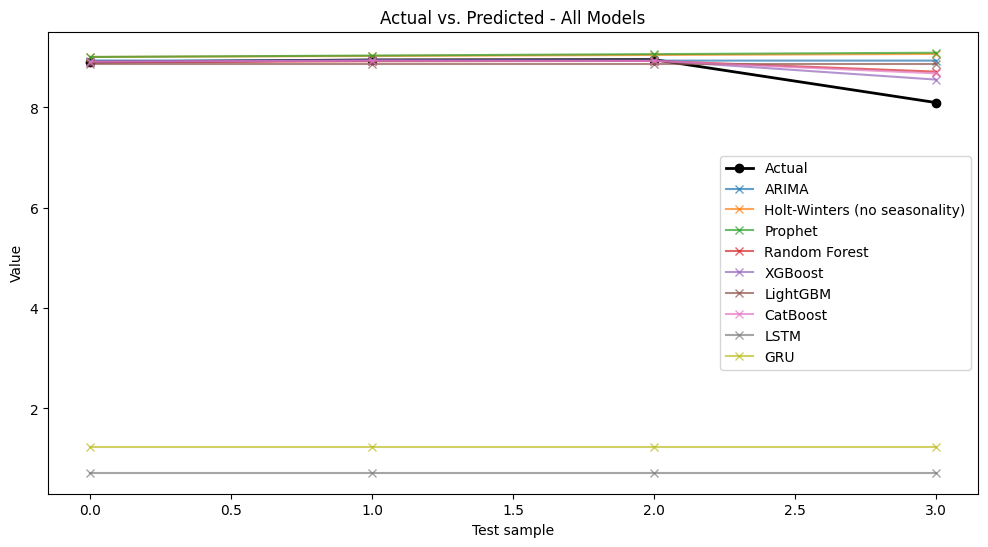

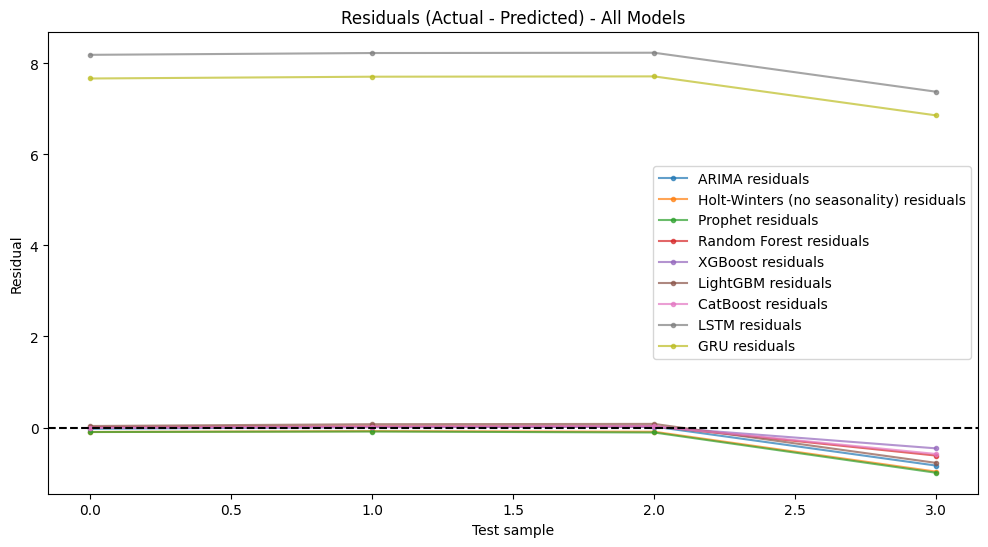

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Metric functions ---
def mae(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

def mape(y_true, y_pred):
    y_true = np.where(y_true == 0, np.nan, y_true)
    return np.nanmean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    denominator = np.where(denominator == 0, np.nan, denominator)
    return np.nanmean(np.abs(y_true - y_pred) / denominator) * 100

from sklearn.metrics import r2_score

# --- Compare all models ---
results = []
for name, y_pred in models.items():
    results.append({
        "Model": name,
        "R2": r2_score(y_test, y_pred),
        "MAE": mae(y_test, y_pred),
        "RMSE": rmse(y_test, y_pred),
        "MAPE": mape(y_test, y_pred),
        "SMAPE": smape(y_test, y_pred)
    })
results_df = pd.DataFrame(results).sort_values("RMSE")
display(results_df.set_index('Model').style.format({'R2': '{:.3f}', 'MAE': '{:.3f}', 'RMSE': '{:.3f}', 'MAPE': '{:.2f}', 'SMAPE': '{:.2f}'}).background_gradient(subset=['R2', 'MAE', 'RMSE', 'MAPE', 'SMAPE'], cmap='RdYlGn_r'))

# --- Visualization: actual vs predicted for all models ---
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', marker='o', linewidth=2, color='black')
for name, y_pred in models.items():
    plt.plot(y_pred, marker='x', label=name, alpha=0.7)
plt.title('Actual vs. Predicted - All Models')
plt.legend()
plt.xlabel('Test sample')
plt.ylabel('Value')
plt.show()

# --- Residuals for all models ---
plt.figure(figsize=(12, 6))
for name, y_pred in models.items():
    residuals = y_test - y_pred
    plt.plot(residuals, marker='.', label=f'{name} residuals', alpha=0.7)
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals (Actual - Predicted) - All Models')
plt.xlabel('Test sample')
plt.ylabel('Residual')
plt.legend()
plt.show()

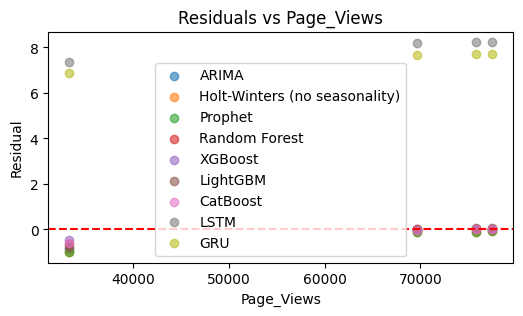

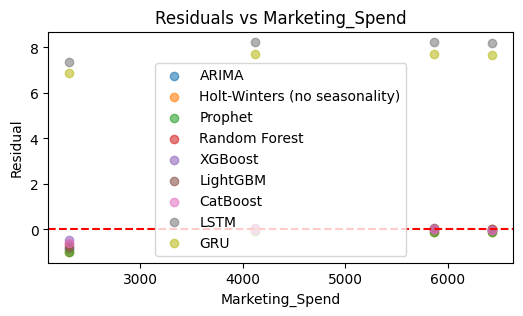

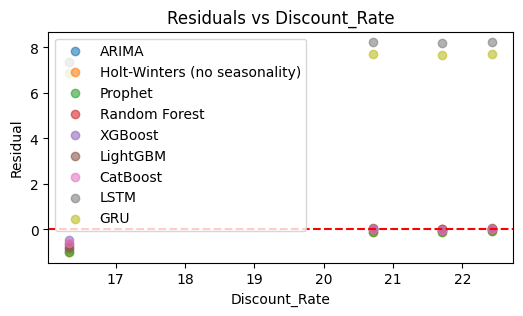

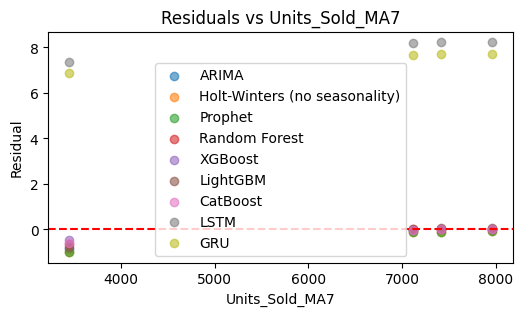

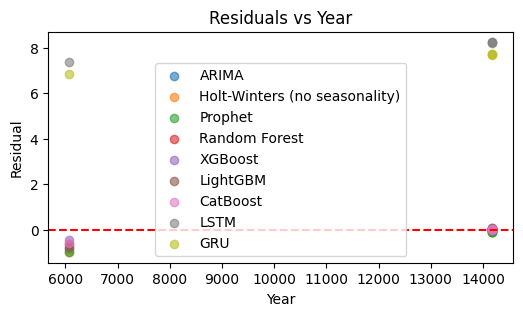

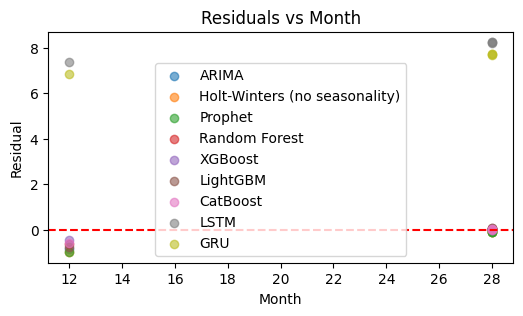

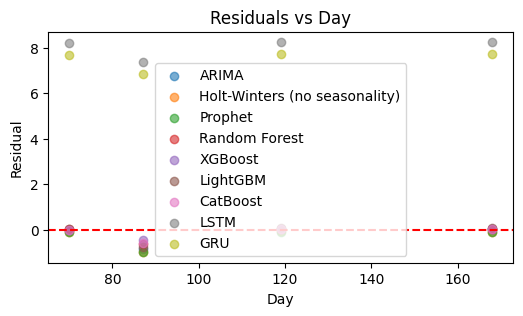

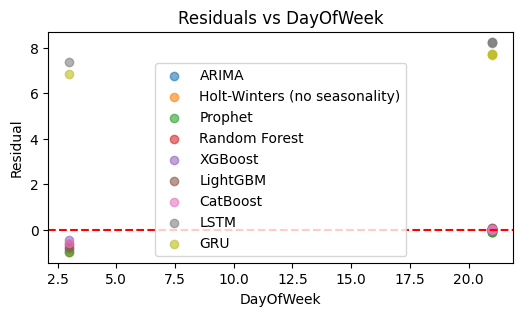

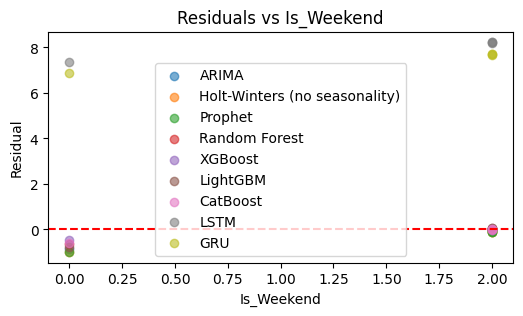

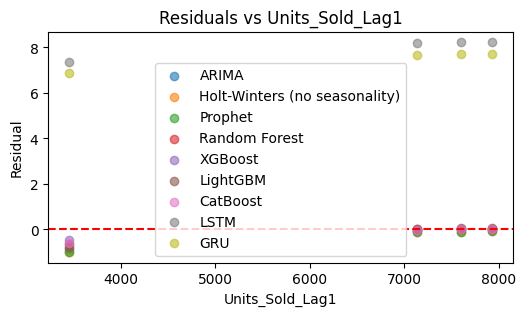

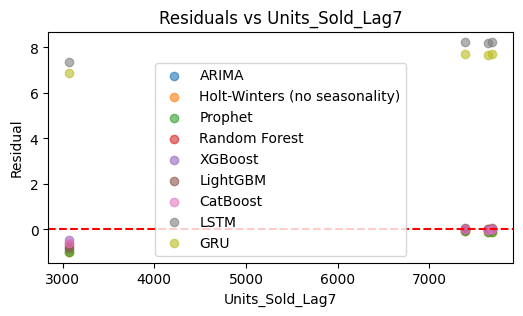

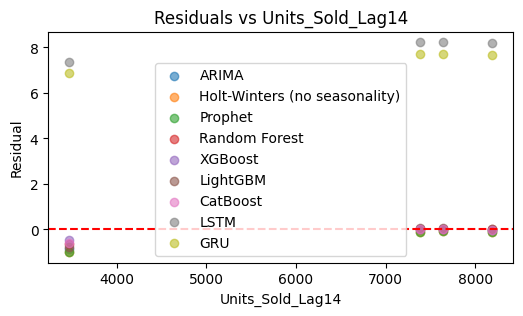

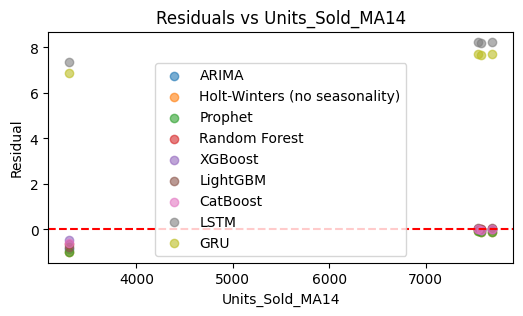

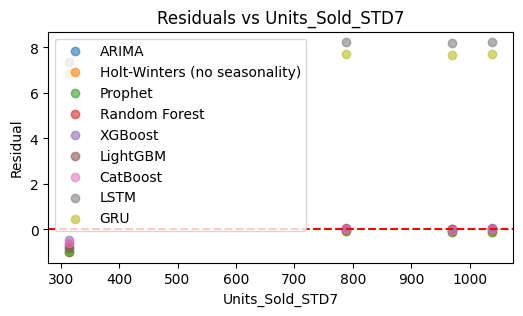

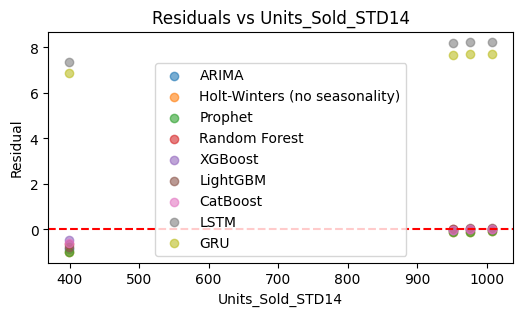

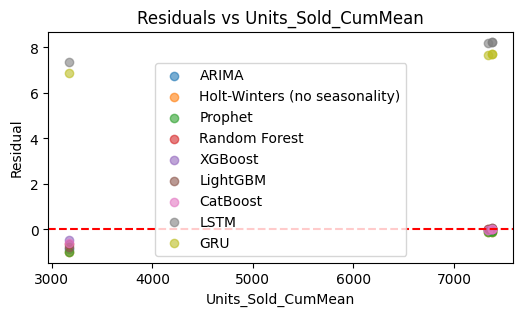

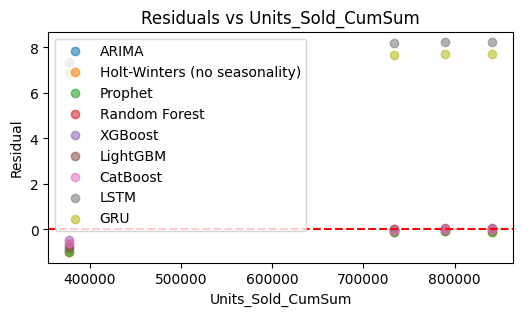

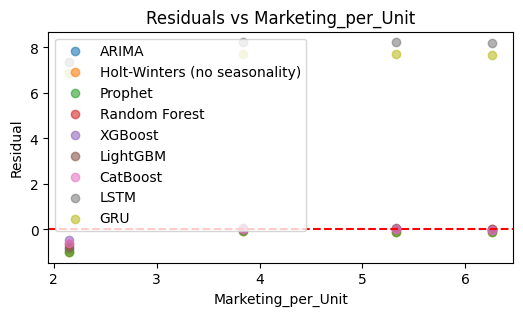

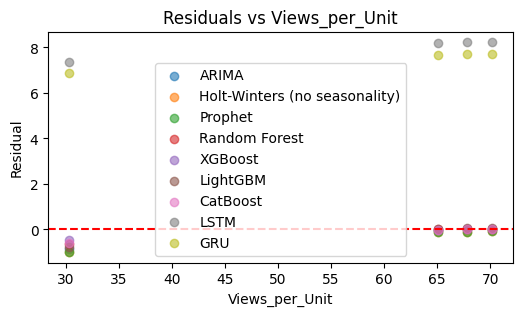

In [ ]:
# Plot residuals against each feature
for feature_idx, feature_name in enumerate(feature_cols):
    plt.figure(figsize=(6,3))
    for name, y_pred in models.items():
        residuals = y_test - y_pred
        plt.scatter(X_test[:, feature_idx], residuals, label=name, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel(feature_name)
    plt.ylabel('Residual')
    plt.title(f'Residuals vs {feature_name}')
    plt.legend()
    plt.show()

<Figure size 600x300 with 0 Axes>

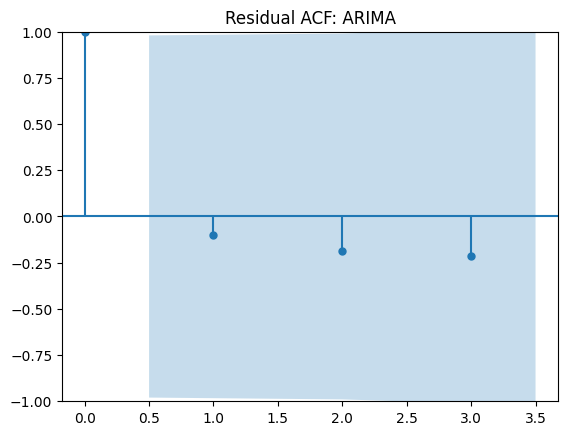

<Figure size 600x300 with 0 Axes>

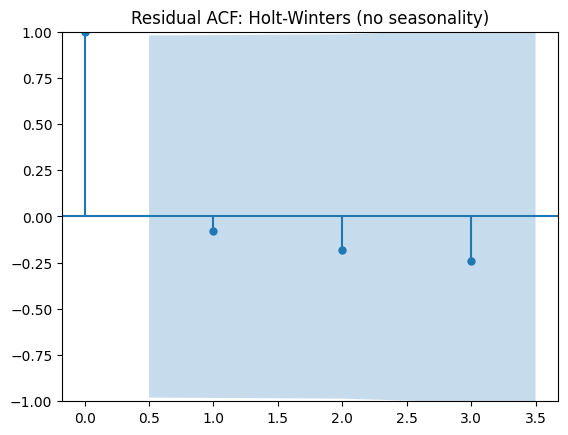

<Figure size 600x300 with 0 Axes>

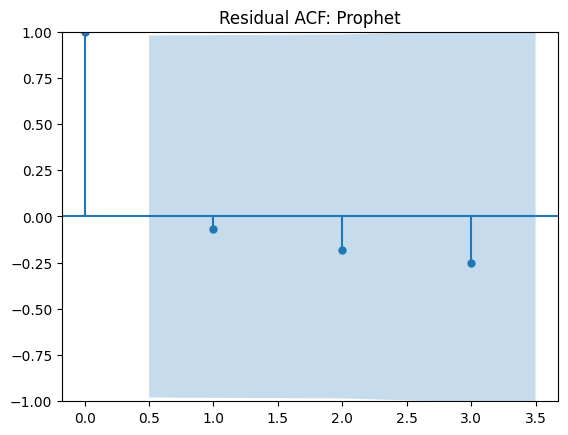

<Figure size 600x300 with 0 Axes>

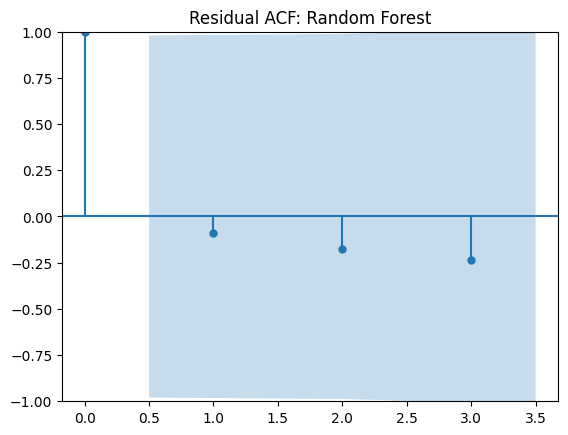

<Figure size 600x300 with 0 Axes>

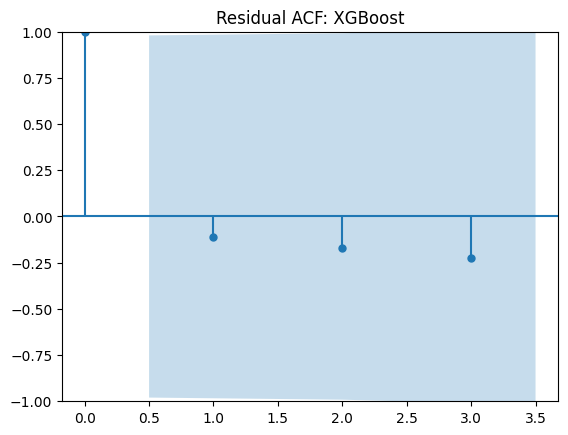

<Figure size 600x300 with 0 Axes>

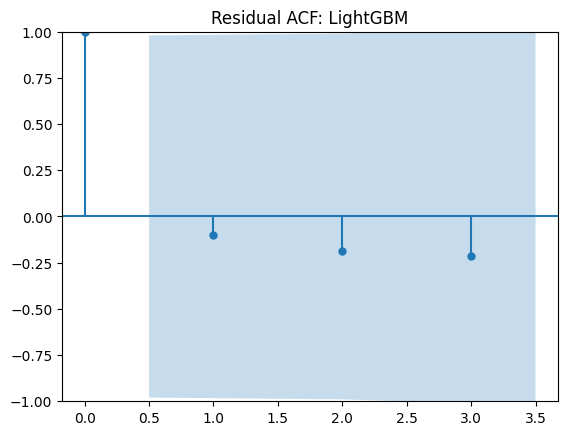

<Figure size 600x300 with 0 Axes>

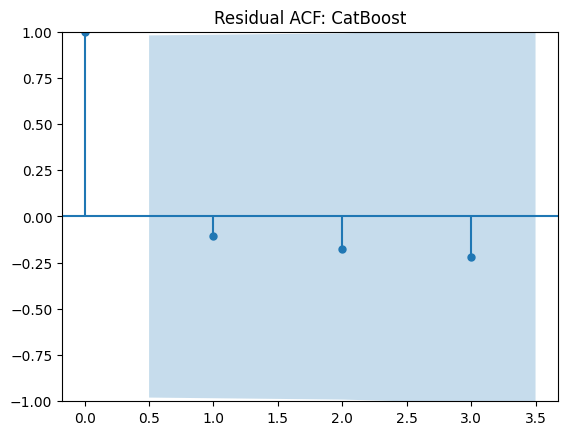

<Figure size 600x300 with 0 Axes>

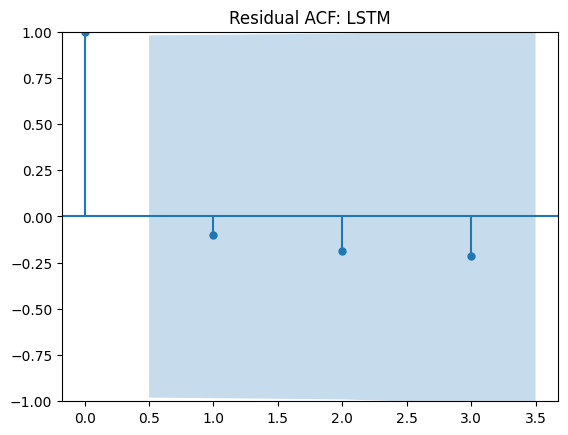

<Figure size 600x300 with 0 Axes>

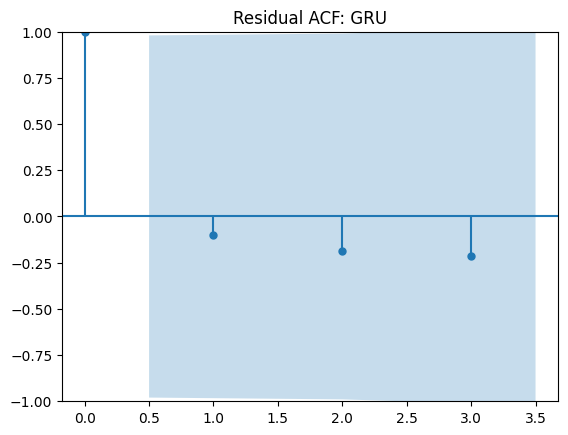

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

for name, y_pred in models.items():
    residuals = y_test - y_pred
    plt.figure(figsize=(6,3))
    plot_acf(residuals, lags=min(10, len(residuals)-1))
    plt.title(f'Residual ACF: {name}')
    plt.show()

In [ ]:
df_feat = df_weekly.copy()
for lag in [1, 2, 3]:
    df_feat[f'{target_col}_lag{lag}'] = df_feat[target_col].shift(lag)

# Drop rows with NaNs caused by lagging
df_feat = df_feat.dropna().reset_index(drop=True)

# Redefine features and target
feature_cols_new = [col for col in df_feat.columns if col not in ['Date', 'Units_Sold', 'Units_Sold_log', 'Units_Sold_boxcox', 'Units_Sold_diff1']]
X_new = df_feat[feature_cols_new].values
y_new = df_feat[target_col].values

# Redo train-test split
split_idx_new = int(0.8 * len(df_feat))
X_train_new, X_test_new = X_new[:split_idx_new], X_new[split_idx_new:]
y_train_new, y_test_new = y_new[:split_idx_new], y_new[split_idx_new:]

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 3, 4, None],
    'min_samples_split': [2, 4, 6]
}

tscv = TimeSeriesSplit(n_splits=3)
rf = RandomForestRegressor(random_state=42)
grid = GridSearchCV(rf, param_grid, cv=tscv, scoring='neg_mean_squared_error')
grid.fit(X_train_new, y_train_new)

print("Best Params:", grid.best_params_)
print("Best CV Score:", -grid.best_score_)

# Evaluate on test set
y_pred_rf_tuned = grid.predict(X_test_new)
print("Tuned RF Test RMSE:", rmse(y_test_new, y_pred_rf_tuned))

Best Params: {'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best CV Score: 0.0028584551269547867
Tuned RF Test RMSE: 0.44462847720876136


In [ ]:
# Make sure these exist in your models dict!
ensemble_members = ['Prophet', 'XGBoost', 'LSTM']
ensemble_preds = np.mean([models[m] for m in ensemble_members], axis=0)

print("Averaging Ensemble Metrics:")
print(f"  MAE:   {mae(y_test, ensemble_preds):.3f}")
print(f"  RMSE:  {rmse(y_test, ensemble_preds):.3f}")
print(f"  MAPE:  {mape(y_test, ensemble_preds):.2f}%")
print(f"  SMAPE: {smape(y_test, ensemble_preds):.2f}%\n")

Averaging Ensemble Metrics:
  MAE:   2.525
  RMSE:  2.545
  MAPE:  28.83%
  SMAPE: 33.73%



In [ ]:
weights = [0.5, 0.3, 0.2]  # Prophet=0.5, XGBoost=0.3, LSTM=0.2
ensemble_preds_weighted = (
    weights[0]*models['Prophet'] +
    weights[1]*models['XGBoost'] +
    weights[2]*models['LSTM']
)

print("Weighted Averaging Ensemble Metrics:")
print(f"  MAE:   {mae(y_test, ensemble_preds_weighted):.3f}")
print(f"  RMSE:  {rmse(y_test, ensemble_preds_weighted):.3f}")
print(f"  MAPE:  {mape(y_test, ensemble_preds_weighted):.2f}%")
print(f"  SMAPE: {smape(y_test, ensemble_preds_weighted):.2f}%\n")

Weighted Averaging Ensemble Metrics:
  MAE:   1.407
  RMSE:  1.444
  MAPE:  15.99%
  SMAPE: 17.44%



In [ ]:
from sklearn.linear_model import LinearRegression

# Stack predictions as features
stacked_X = np.vstack([models[m] for m in ensemble_members]).T  # shape: [n_samples, n_models]
meta_model = LinearRegression()
meta_model.fit(stacked_X, y_test)
ensemble_preds_stacked = meta_model.predict(stacked_X)

print("Stacking Ensemble Metrics (Linear Regression):")
print(f"  MAE:   {mae(y_test, ensemble_preds_stacked):.3f}")
print(f"  RMSE:  {rmse(y_test, ensemble_preds_stacked):.3f}")
print(f"  MAPE:  {mape(y_test, ensemble_preds_stacked):.2f}%")
print(f"  SMAPE: {smape(y_test, ensemble_preds_stacked):.2f}%\n")

Stacking Ensemble Metrics (Linear Regression):
  MAE:   0.006
  RMSE:  0.008
  MAPE:  0.07%
  SMAPE: 0.07%



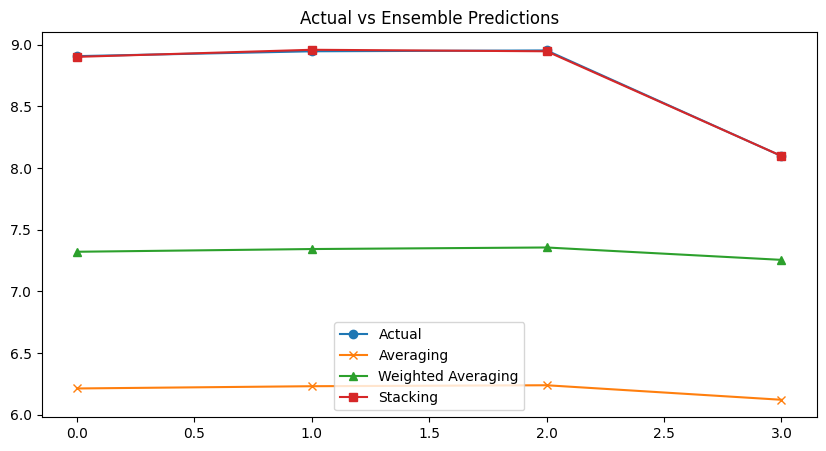

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(ensemble_preds, label='Averaging', marker='x')
plt.plot(ensemble_preds_weighted, label='Weighted Averaging', marker='^')
plt.plot(ensemble_preds_stacked, label='Stacking', marker='s')
plt.title('Actual vs Ensemble Predictions')
plt.legend()
plt.show()

In [ ]:
!pip install shap

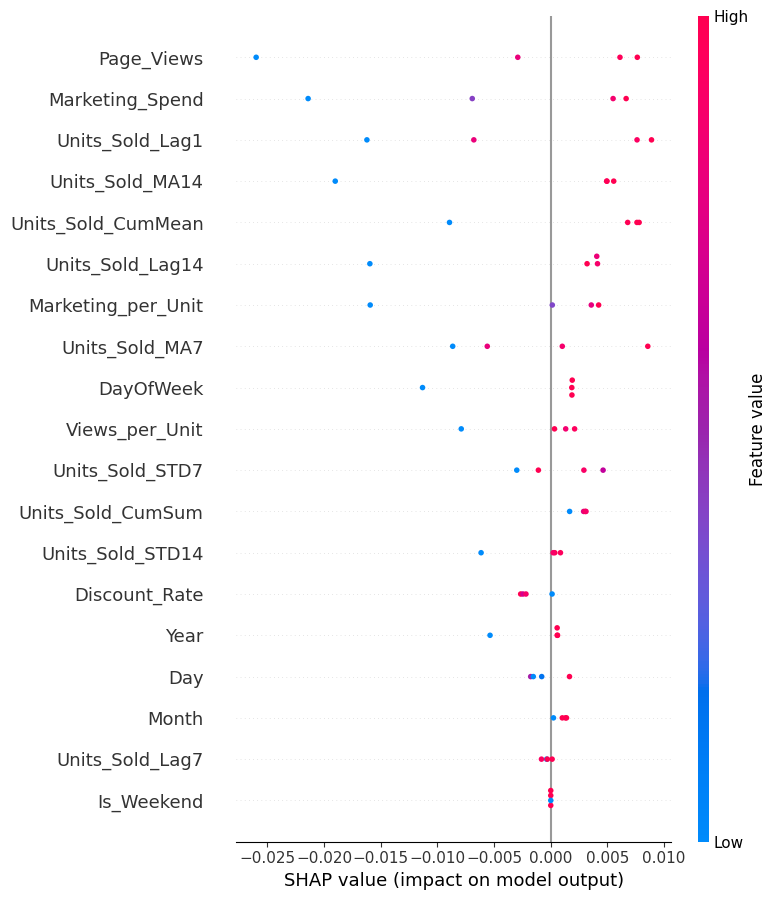

In [ ]:
import shap

# Fit model again if needed (example with RandomForest)
rf.fit(X_train, y_train)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Feature importance summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_cols)

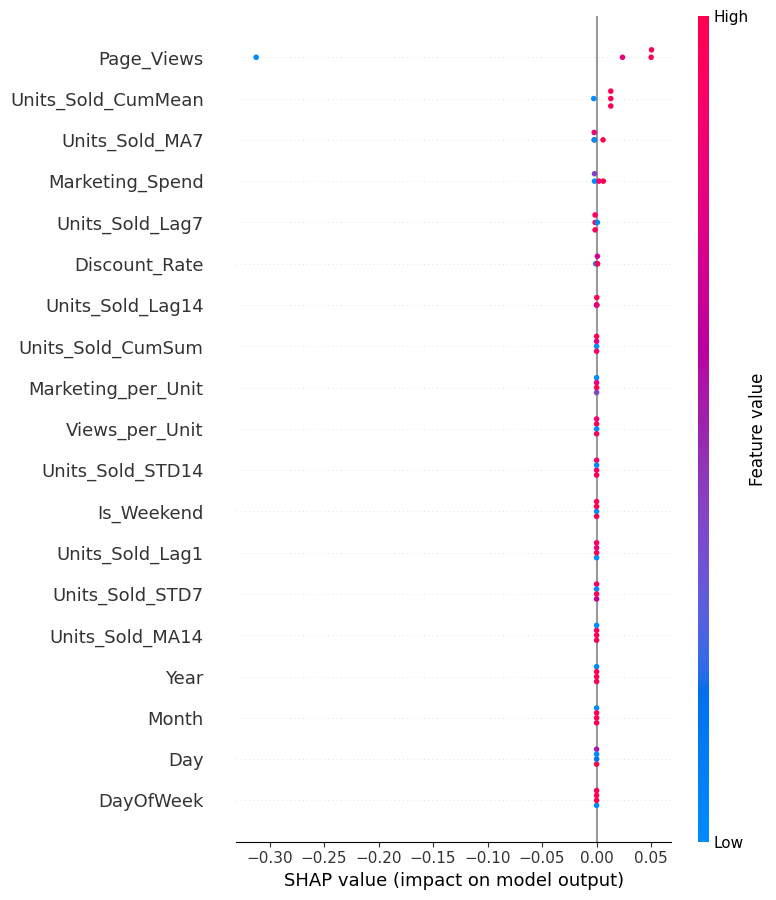

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 12, number of used features: 0
[LightGBM] [Info] Start training from score 8.874660
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

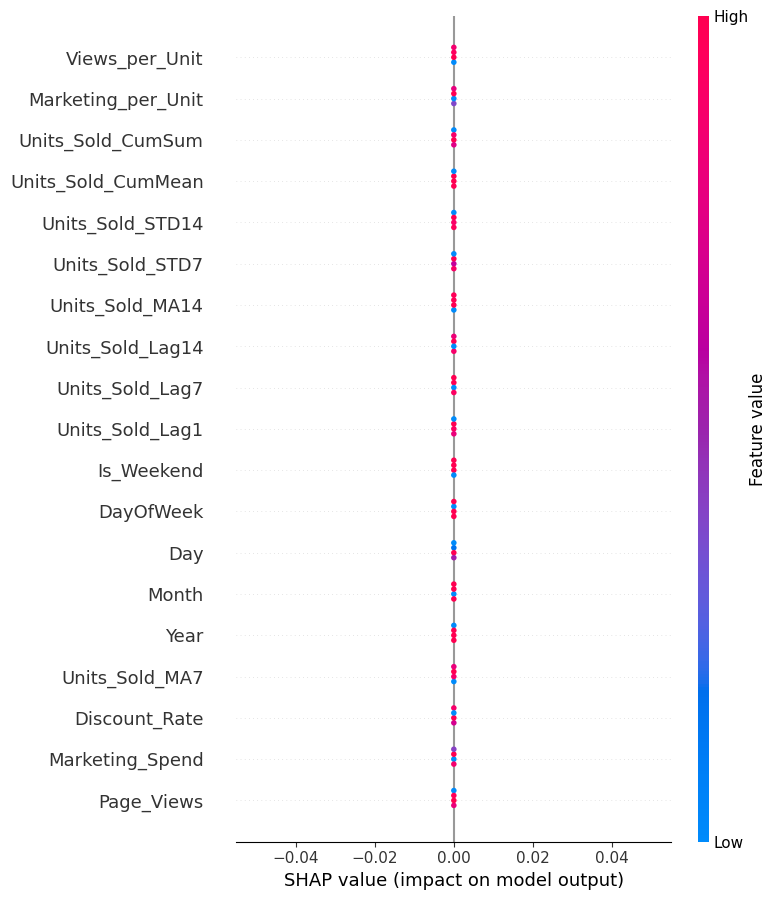

In [ ]:
# For XGBoost
xgb.fit(X_train, y_train)
explainer_xgb = shap.TreeExplainer(xgb)
shap_values_xgb = explainer_xgb.shap_values(X_test)
shap.summary_plot(shap_values_xgb, X_test, feature_names=feature_cols)

# For LightGBM
lgbm.fit(X_train, y_train)
explainer_lgbm = shap.TreeExplainer(lgbm)
shap_values_lgbm = explainer_lgbm.shap_values(X_test)
shap.summary_plot(shap_values_lgbm, X_test, feature_names=feature_cols)

Permutation Importances:
 Page_Views            6.150654e-03
Marketing_Spend       6.067346e-03
Units_Sold_MA14       5.178172e-03
Units_Sold_Lag1       4.811860e-03
Marketing_per_Unit    4.177557e-03
Units_Sold_Lag14      4.066368e-03
DayOfWeek             2.772861e-03
Units_Sold_CumMean    2.509819e-03
Units_Sold_MA7        1.948033e-03
Views_per_Unit        1.889840e-03
Units_Sold_STD14      1.277220e-03
Year                  1.191415e-03
Units_Sold_STD7       8.286153e-04
Units_Sold_CumSum     2.376183e-04
Day                   1.569558e-04
Is_Weekend            0.000000e+00
Month                -7.318938e-08
Units_Sold_Lag7      -3.654007e-05
Discount_Rate        -4.223702e-04
dtype: float64


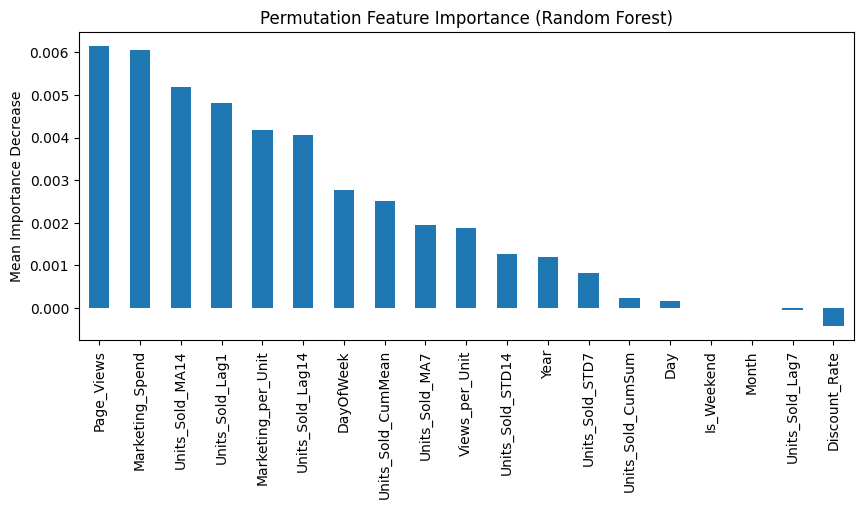

In [ ]:
from sklearn.inspection import permutation_importance

rf.fit(X_train, y_train)
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_squared_error')

import pandas as pd
import matplotlib.pyplot as plt

# Table of importances
perm_importances = pd.Series(result.importances_mean, index=feature_cols).sort_values(ascending=False)
print("Permutation Importances:\n", perm_importances)

# Bar plot
perm_importances.plot.bar(figsize=(10,4))
plt.title("Permutation Feature Importance (Random Forest)")
plt.ylabel("Mean Importance Decrease")
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame with results
df_results = pd.DataFrame({
    "Date": dates_test,
    "Actual": y_test,
    "Forecast": ensemble_preds
})

# Calculate growth (difference from previous period)
df_results["Forecast_Growth"] = df_results["Forecast"].diff()
df_results["Actual_Growth"] = df_results["Actual"].diff()

# Find periods with highest growth and decline
top_growth = df_results.sort_values("Forecast_Growth", ascending=False).head(3)
top_decline = df_results.sort_values("Forecast_Growth").head(3)

print("Top forecasted growth periods:")
print(top_growth[["Date", "Forecast", "Forecast_Growth"]])

print("\nTop forecasted decline periods:")
print(top_decline[["Date", "Forecast", "Forecast_Growth"]])

Top forecasted growth periods:
        Date  Forecast  Forecast_Growth
1 2025-04-20  6.231915         0.018243
2 2025-04-27  6.239713         0.007799
3 2025-05-04  6.121955        -0.117759

Top forecasted decline periods:
        Date  Forecast  Forecast_Growth
3 2025-05-04  6.121955        -0.117759
2 2025-04-27  6.239713         0.007799
1 2025-04-20  6.231915         0.018243


In [ ]:
# Thresholds (customize as needed)
growth_threshold = df_results["Forecast_Growth"].quantile(0.90)
decline_threshold = df_results["Forecast_Growth"].quantile(0.10)

print("\nActionable Recommendations:")
for idx, row in df_results.iterrows():
    if row["Forecast_Growth"] >= growth_threshold:
        print(f"- {row['Date']}: Large forecasted increase ({row['Forecast_Growth']:.1f}). Suggest: STOCK UP, optimize supply chain.")
    elif row["Forecast_Growth"] <= decline_threshold:
        print(f"- {row['Date']}: Large forecasted drop ({row['Forecast_Growth']:.1f}). Suggest: Run promotion, reduce inventory, or investigate cause.")


Actionable Recommendations:
- 2025-04-20 00:00:00: Large forecasted increase (0.0). Suggest: STOCK UP, optimize supply chain.
- 2025-05-04 00:00:00: Large forecasted drop (-0.1). Suggest: Run promotion, reduce inventory, or investigate cause.
